# Init

In [1]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(r'/nfs/public_data/notebooks/alpha/')
import json
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pymysql
import datetime as dt
from sklearn.linear_model import LinearRegression
%matplotlib inline
warnings.filterwarnings('ignore')
from zhan_function import cal_ic

# Data Preparation

In [2]:
# 新增5个因子
factor_index=np.load('../HighFrequency/alpha_day_bar/npy/index.npy')
factor_index=[x[4:] for x in factor_index]

# 股票列表
stock_list=np.load('../HighFrequency/stock_list.npy')

In [3]:
# 股票日线数据
stocks=[]
    
for i in range(len(stock_list)):
    df_stock_info = pd.read_csv('../HighFrequency/alpha_day_bar/csv/'+stock_list[i]+'.csv')
    df_stock_info['SecuCode'] = stock_list[i]     
    stocks.append(df_stock_info)

stocks=pd.concat(stocks,axis=0)
stocks.reset_index(inplace=True,drop=True)

# 5因子数据
factors=[]
for factor in factor_index:
    factors.append(pd.DataFrame(np.load('../HighFrequency/alpha_day_bar/npy/'+factor+'.npy')))  

factors=pd.concat(factors,axis=1)
factors.columns=factor_index

In [4]:
# 拼接secucode,date
# 总计1116160=2048票*545天
# 因子堆叠方式：index0-2047为第一天因子
df_date=pd.DataFrame(list(stocks['date_'].drop_duplicates()),columns=['date_'])
df_date['key']=0
df_stock=pd.DataFrame(list(stock_list),columns=['SecuCode'])
df_stock['key']=0

df_index=pd.merge(df_date,df_stock,on='key')
df_index.drop(columns='key',inplace=True)

In [5]:
# 拼接因子与index
factors=pd.concat([factors,df_index],axis=1)

# 合并日线数据与5因子
df_base=pd.merge(stocks,factors,on=['date_','SecuCode'])
df_base

,date_time_,date_,time_,open_,open_t,high_,low_,close_,volume_,turnover_,ratio,SecuCode,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h
0,201701031500,20170103,930,117723.619030,117723.619030,118628.192405,117465.162999,117594.391014,459840.0,4.205952e+08,113.677002,000001,0.007684,0.998902,-1.097712e-03,0.000000,0.000000
1,201701041500,20170104,930,117723.619030,118240.519726,118628.192405,117465.162999,118369.736374,459840.0,4.205952e+08,113.677002,000001,0.003279,1.001093,1.092780e-03,0.111105,0.000000
2,201701051500,20170105,930,118240.519726,118498.964390,118628.192405,118111.291710,118369.736374,449330.0,4.115035e+08,113.677002,000001,0.001091,0.998909,-1.090529e-03,-0.180545,0.000000
3,201701061500,20170106,930,118498.964390,118498.964390,118628.192405,118240.519726,118498.964390,344373.0,3.157697e+08,113.677002,000001,0.001091,1.000000,0.000000e+00,0.124992,0.000000
4,201701091500,20170109,930,118498.964390,117982.063694,118498.964390,117723.619030,117982.063694,358154.0,3.271764e+08,113.677002,000001,0.004381,1.000000,0.000000e+00,0.000000,0.000000
5,201701101500,20170110,930,117982.063694,118240.519726,118498.964390,117723.619030,118240.519726,361082.0,3.299946e+08,113.677002,000001,0.002186,1.000000,0.000000e+00,0.000000,0.000000
6,201701111500,20170111,930,118240.519726,118111.291710,118369.736374,118111.291710,118240.519726,241054.0,2.205751e+08,113.677002,000001,0.002188,1.001094,1.094175e-03,0.250023,0.000000
7,201701121500,20170112,930,118111.291710,117982.063694,118498.964390,117982.063694,118111.291710,303431.0,2.775532e+08,113.677002,000001,0.004381,1.001095,1.095307e-03,-0.125013,0.000000
8,201701131500,20170113,930,117982.063694,118111.291710,118498.964390,117982.063694,118240.519726,428007.0,3.918694e+08,113.677002,000001,0.003282,1.001094,1.094175e-03,0.000000,0.000000
9,201701161500,20170116,930,118111.291710,118240.519726,118757.409054,117852.835678,118369.736374,434301.0,3.976019e+08,113.677002,000001,0.004371,1.001093,1.092780e-03,-0.053584,0.000000


In [6]:
# AlphaFactor
df_json=pd.read_json('../factor_csv/factor_2019_4.json')
df_json = pd.DataFrame(df_json.stack())
df_json.reset_index(inplace=True)
df_json.rename(columns={'level_0': 'stock',
                        'level_1': 'TradingDay', 0: 'AlphaFactor'}, inplace=True)
df_json['SecuCode'] = df_json['stock'].map(lambda x: x[0:6])
df_json['date_'] = df_json['TradingDay'].apply(lambda x: int(x.strftime('%Y%m%d')))
df_json

,stock,TradingDay,AlphaFactor,SecuCode,date_
0,000001.XSHE,2019-01-02,0.039968,000001,20190102
1,000001.XSHE,2019-01-03,-0.019371,000001,20190103
2,000001.XSHE,2019-01-04,0.108212,000001,20190104
3,000001.XSHE,2019-01-07,-0.137846,000001,20190107
4,000001.XSHE,2019-01-08,0.072366,000001,20190108
5,000001.XSHE,2019-01-09,-0.169205,000001,20190109
6,000001.XSHE,2019-01-10,0.132417,000001,20190110
7,000001.XSHE,2019-01-11,-0.186061,000001,20190111
8,000001.XSHE,2019-01-14,-0.278337,000001,20190114
9,000001.XSHE,2019-01-15,-0.130204,000001,20190115


## 5+1因子总表

In [7]:
# 5+1因子
df_factor = pd.merge(left=df_base, right=df_json[['SecuCode', 'date_', 'AlphaFactor']], on=['SecuCode', 'date_'], how='left')
df_factor['close_t']=df_factor.groupby(['SecuCode'])['close_'].shift(-1)
df_factor['return']=df_factor['close_t']/df_factor['open_t']-1
df_factor['month_']=df_factor['date_'].apply(lambda x:int(str(x)[:6]))
df_factor

,date_time_,date_,time_,open_,open_t,high_,low_,close_,volume_,turnover_,...,SecuCode,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h,AlphaFactor,close_t,return,month_
0,201701031500,20170103,930,117723.619030,117723.619030,118628.192405,117465.162999,117594.391014,459840.0,4.205952e+08,...,000001,0.007684,0.998902,-1.097712e-03,0.000000,0.000000,NaN,118369.736374,0.005488,201701
1,201701041500,20170104,930,117723.619030,118240.519726,118628.192405,117465.162999,118369.736374,459840.0,4.205952e+08,...,000001,0.003279,1.001093,1.092780e-03,0.111105,0.000000,NaN,118369.736374,0.001093,201701
2,201701051500,20170105,930,118240.519726,118498.964390,118628.192405,118111.291710,118369.736374,449330.0,4.115035e+08,...,000001,0.001091,0.998909,-1.090529e-03,-0.180545,0.000000,NaN,118498.964390,0.000000,201701
3,201701061500,20170106,930,118498.964390,118498.964390,118628.192405,118240.519726,118498.964390,344373.0,3.157697e+08,...,000001,0.001091,1.000000,0.000000e+00,0.124992,0.000000,NaN,117982.063694,-0.004362,201701
4,201701091500,20170109,930,118498.964390,117982.063694,118498.964390,117723.619030,117982.063694,358154.0,3.271764e+08,...,000001,0.004381,1.000000,0.000000e+00,0.000000,0.000000,NaN,118240.519726,0.002191,201701
5,201701101500,20170110,930,117982.063694,118240.519726,118498.964390,117723.619030,118240.519726,361082.0,3.299946e+08,...,000001,0.002186,1.000000,0.000000e+00,0.000000,0.000000,NaN,118240.519726,0.000000,201701
6,201701111500,20170111,930,118240.519726,118111.291710,118369.736374,118111.291710,118240.519726,241054.0,2.205751e+08,...,000001,0.002188,1.001094,1.094175e-03,0.250023,0.000000,NaN,118111.291710,0.000000,201701
7,201701121500,20170112,930,118111.291710,117982.063694,118498.964390,117982.063694,118111.291710,303431.0,2.775532e+08,...,000001,0.004381,1.001095,1.095307e-03,-0.125013,0.000000,NaN,118240.519726,0.002191,201701
8,201701131500,20170113,930,117982.063694,118111.291710,118498.964390,117982.063694,118240.519726,428007.0,3.918694e+08,...,000001,0.003282,1.001094,1.094175e-03,0.000000,0.000000,NaN,118369.736374,0.002188,201701
9,201701161500,20170116,930,118111.291710,118240.519726,118757.409054,117852.835678,118369.736374,434301.0,3.976019e+08,...,000001,0.004371,1.001093,1.092780e-03,-0.053584,0.000000,NaN,118111.291710,-0.001093,201701


## 5因子 df_factor1

In [8]:
df_factor1=df_factor[factor_index+['date_','month_','return']]
df_factor1.dropna(inplace=True)
df_factor1.reset_index(inplace=True,drop=True)
df_factor1

,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h,date_,month_,return
0,0.007684,0.998902,-1.097712e-03,0.000000,0.000000,20170103,201701,0.005488
1,0.003279,1.001093,1.092780e-03,0.111105,0.000000,20170104,201701,0.001093
2,0.001091,0.998909,-1.090529e-03,-0.180545,0.000000,20170105,201701,0.000000
3,0.001091,1.000000,0.000000e+00,0.124992,0.000000,20170106,201701,-0.004362
4,0.004381,1.000000,0.000000e+00,0.000000,0.000000,20170109,201701,0.002191
5,0.002186,1.000000,0.000000e+00,0.000000,0.000000,20170110,201701,0.000000
6,0.002188,1.001094,1.094175e-03,0.250023,0.000000,20170111,201701,0.000000
7,0.004381,1.001095,1.095307e-03,-0.125013,0.000000,20170112,201701,0.002191
8,0.003282,1.001094,1.094175e-03,0.000000,0.000000,20170113,201701,0.002188
9,0.004371,1.001093,1.092780e-03,-0.053584,0.000000,20170116,201701,-0.001093


## 0号因子 df_factor2

In [9]:
df_factor2=df_factor[['date_','month_','return','AlphaFactor']]
df_factor2.dropna(inplace=True)
df_factor2.reset_index(inplace=True,drop=True)
df_factor2

,date_,month_,return,AlphaFactor
0,20190102,201901,-0.021299,0.039968
1,20190103,201901,0.010893,-0.019371
2,20190104,201901,0.055195,0.108212
3,20190107,201901,-0.010163,-0.137846
4,20190108,201901,-0.007194,0.072366
5,20190109,201901,0.020534,-0.169205
6,20190110,201901,0.023303,0.132417
7,20190111,201901,0.008902,-0.186061
8,20190114,201901,-0.010763,-0.278337
9,20190115,201901,0.012859,-0.130204


## 5+1因子公共 df_factor3

In [10]:
df_factor3=df_factor[df_factor['date_']>=20190102]
df_factor3.reset_index(inplace=True,drop=True)
df_factor3

,date_time_,date_,time_,open_,open_t,high_,low_,close_,volume_,turnover_,...,SecuCode,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h,AlphaFactor,close_t,return,month_
0,201901021500,20190102,930,127777.693680,128875.673167,129836.408146,127777.693680,128738.428660,576604.0,5.415710e+08,...,000001,0.007455,0.998935,1.667129e-02,0.038099,0.002053,0.039968,126130.712735,-0.021299,201901
1,201901031500,20190103,930,128875.673167,125993.468228,129287.418403,125718.967499,126130.712735,539386.0,4.986951e+08,...,000001,0.026144,1.001089,2.761496e-02,0.052559,-0.035282,-0.019371,127365.948444,0.010893,201901
2,201901041500,20190104,930,125993.468228,126816.958701,128052.182694,125718.967499,127365.948444,415538.0,3.844577e+08,...,000001,0.009740,1.004329,4.081023e-02,0.098417,-0.000569,0.108212,133816.592570,0.055195,201901
3,201901071500,20190107,930,126816.958701,135051.828279,134777.327550,126816.958701,133816.592570,1481159.0,1.422150e+09,...,000001,-0.002033,0.990854,-9.146373e-03,-0.195233,0.177197,-0.137846,133679.348063,-0.010163,201901
4,201901081500,20190108,930,135051.828279,133542.091841,135051.828279,132306.867848,133679.348063,865688.0,8.411665e+08,...,000001,0.011305,1.001028,1.027766e-03,0.102588,-0.003115,0.072366,132581.356862,-0.007194,201901
5,201901091500,20190109,930,133542.091841,133679.348063,133679.348063,132169.623341,132581.356862,402388.0,3.892478e+08,...,000001,0.000000,0.991786,-8.213568e-03,-0.388634,0.008451,-0.169205,136424.296779,0.020534,201901
6,201901101500,20190110,930,133679.348063,135463.561800,138345.766738,133130.358320,136424.296779,1233486.0,1.229465e+09,...,000001,0.021277,1.007092,7.092198e-03,0.455737,-0.008359,0.132417,138620.267467,0.023303,201901
7,201901111500,20190111,930,135463.561800,138757.511974,139992.747683,135463.561800,138620.267467,1071818.0,1.079711e+09,...,000001,0.008902,0.999011,-9.891356e-04,-0.107256,0.016058,-0.186061,139992.747683,0.008902,201901
8,201901141500,20190114,930,138757.511974,140267.236697,140129.992190,137934.021502,139992.747683,696365.0,7.080018e+08,...,000001,-0.000978,0.998043,-1.956867e-03,-0.047349,0.012257,-0.278337,138757.511974,-0.010763,201901
9,201901151500,20190115,930,140267.236697,138757.511974,140678.981933,138208.522231,138757.511974,500444.0,5.078629e+08,...,000001,0.013848,1.000000,0.000000e+00,0.062500,-0.009723,-0.130204,140541.737426,0.012859,201901


# Research

## Correlation

### 5因子 vs return

In [11]:
cal_ic.cal_general_ic(df_factor1,factor_index,'return')

General Correlation Results:
********************
The general correlation of 20220_2_minus_c_devide_c_4h against return is:7.88%
The general correlation of 20217_2_divide_by_c_4h against return is:6.63%
The general correlation of 3021_2_minus_c_devide_c_4h against return is:4.20%
The general correlation of 21605_2_diff_4h against return is:0.52%
The general correlation of 31430_2_base_4h against return is:-1.82%


20220_2_minus_c_devide_c_4h    0.078823
20217_2_divide_by_c_4h         0.066253
3021_2_minus_c_devide_c_4h     0.041971
21605_2_diff_4h                0.005221
31430_2_base_4h               -0.018151
return                         1.000000
Name: return, dtype: float64

In [12]:
cal_ic.cal_panel_ic(df_factor1,'date_',factor_index,'return')

'date_' Panel Correlation Results:
********************
The correlation of 20220_2_minus_c_devide_c_4h against return is:11.56%
--------------------
The correlation of 20217_2_divide_by_c_4h against return is:12.90%
--------------------
The correlation of 3021_2_minus_c_devide_c_4h against return is:8.57%
--------------------
The correlation of 21605_2_diff_4h against return is:4.37%
--------------------
The correlation of 31430_2_base_4h against return is:-5.34%
--------------------


20220_2_minus_c_devide_c_4h    0.115604
20217_2_divide_by_c_4h         0.128951
3021_2_minus_c_devide_c_4h     0.085736
21605_2_diff_4h                0.043735
31430_2_base_4h               -0.053370
dtype: float64

### 0号因子 vs return

In [13]:
cal_ic.cal_general_ic(df_factor2,['AlphaFactor'],'return')

General Correlation Results:
********************
The general correlation of AlphaFactor against return is:7.15%


AlphaFactor    0.071487
return         1.000000
Name: return, dtype: float64

In [14]:
cal_ic.cal_panel_ic(df_factor2,'date_',['AlphaFactor'],'return')

'date_' Panel Correlation Results:
********************
The correlation of AlphaFactor against return is:16.44%
--------------------


AlphaFactor    0.164358
dtype: float64

### 5+1因子 correlation matrix

In [15]:
df_factor3[factor_index+['AlphaFactor']].corr()

,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h,AlphaFactor
20220_2_minus_c_devide_c_4h,1.000000,0.694400,0.298185,0.168525,-0.316174,0.581290
20217_2_divide_by_c_4h,0.694400,1.000000,0.535541,0.270761,-0.272103,0.760691
3021_2_minus_c_devide_c_4h,0.298185,0.535541,1.000000,0.136828,-0.142516,0.425923
21605_2_diff_4h,0.168525,0.270761,0.136828,1.000000,-0.057749,0.251239
31430_2_base_4h,-0.316174,-0.272103,-0.142516,-0.057749,1.000000,-0.227742
AlphaFactor,0.581290,0.760691,0.425923,0.251239,-0.227742,1.000000


## LinearRegression

### 回归系数DataFrame

#### 5因子回归系数

In [16]:
dates1=list(df_factor1['date_'].drop_duplicates())

k_20220_2_minus_c_devide_c_4h=[]
k_20217_2_divide_by_c_4h=[]
k_3021_2_minus_c_devide_c_4h=[]
k_21605_2_diff_4h=[]
k_31430_2_base_4h=[]

for date in dates1:
    model=LinearRegression()
    
    df=df_factor1[df_factor1['date_']==date].reset_index()
    
    model.fit(pd.DataFrame(df['20220_2_minus_c_devide_c_4h']),df['return'])
    k_20220_2_minus_c_devide_c_4h.append(model.coef_[0])
    
    model.fit(pd.DataFrame(df['20217_2_divide_by_c_4h']),df['return'])
    k_20217_2_divide_by_c_4h.append(model.coef_[0])
    
    model.fit(pd.DataFrame(df['3021_2_minus_c_devide_c_4h']),df['return'])
    k_3021_2_minus_c_devide_c_4h.append(model.coef_[0])
    
    model.fit(pd.DataFrame(df['21605_2_diff_4h']),df['return'])
    k_21605_2_diff_4h.append(model.coef_[0])
    
    model.fit(pd.DataFrame(df['31430_2_base_4h']),df['return'])
    k_31430_2_base_4h.append(model.coef_[0])
    


In [17]:
df_factor1_k=pd.DataFrame([k_20220_2_minus_c_devide_c_4h,k_20217_2_divide_by_c_4h,k_3021_2_minus_c_devide_c_4h,k_21605_2_diff_4h,k_31430_2_base_4h]).T
df_factor1_k.columns=['k_20220_2_minus_c_devide_c_4h','k_20217_2_divide_by_c_4h','k_3021_2_minus_c_devide_c_4h','k_21605_2_diff_4h','k_31430_2_base_4h']
df_factor1_k['date_']=dates1
df_factor1_k

,k_20220_2_minus_c_devide_c_4h,k_20217_2_divide_by_c_4h,k_3021_2_minus_c_devide_c_4h,k_21605_2_diff_4h,k_31430_2_base_4h,date_
0,0.862013,0.969487,0.969486,0.000000,0.000000,20170103
1,0.283528,0.632265,0.632265,0.003211,0.000000,20170104
2,0.213940,0.559930,0.559930,0.005279,0.000000,20170105
3,0.133055,0.497436,0.497435,0.004968,0.000000,20170106
4,0.181825,0.673808,0.673808,0.017284,0.000000,20170109
5,0.054829,0.271049,0.271049,0.000349,0.000000,20170110
6,0.154629,0.436700,0.436700,0.000556,0.000000,20170111
7,0.113656,0.595636,0.595636,0.003853,0.000000,20170112
8,-0.051982,0.409260,0.409259,0.001454,0.000000,20170113
9,-0.375579,0.293776,0.293777,0.006303,0.000000,20170116


#### 0号因子回归系数

In [18]:
dates2=list(df_factor2['date_'].drop_duplicates())

k_alpha_factor=[]

for date in dates2:
    model=LinearRegression()
    
    df=df_factor2[df_factor2['date_']==date].reset_index()
    
    model.fit(pd.DataFrame(df['AlphaFactor']),df['return'])
    k_alpha_factor.append(model.coef_[0])

In [19]:
df_factor2_k=pd.DataFrame(k_alpha_factor,columns=['k_alpha_factor'])
df_factor2_k['date_']=dates2
df_factor2_k

,k_alpha_factor,date_
0,0.015031,20190102
1,0.018087,20190103
2,0.043437,20190104
3,0.020830,20190107
4,0.033134,20190108
5,0.016500,20190109
6,0.026810,20190110
7,0.026989,20190111
8,0.028186,20190114
9,0.016783,20190115


### 回归系数DataFrame修正，剔除0

#### k_20220_2_minus_c_devide_c_4h

In [20]:
df_k_20220_2_minus_c_devide_c_4h=df_factor1_k[['k_20220_2_minus_c_devide_c_4h','date_']]
df_k_20220_2_minus_c_devide_c_4h=df_k_20220_2_minus_c_devide_c_4h[df_k_20220_2_minus_c_devide_c_4h['k_20220_2_minus_c_devide_c_4h']!=0]
df_k_20220_2_minus_c_devide_c_4h.reset_index(inplace=True,drop=True)
df_k_20220_2_minus_c_devide_c_4h['k_20220_2_minus_c_devide_c_4h'].describe()

count    544.000000
mean       0.117729
std        0.130322
min       -0.375579
25%        0.039805
50%        0.117532
75%        0.199822
max        0.862013
Name: k_20220_2_minus_c_devide_c_4h, dtype: float64

In [21]:
df_k_20220_2_minus_c_devide_c_4h['k_20220_2_minus_c_devide_c_4h'].median()

0.1175316832959652

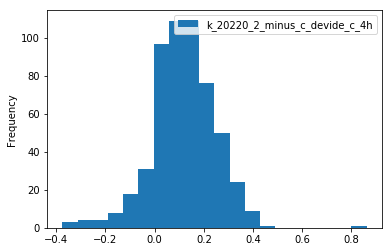

In [22]:
df_k_20220_2_minus_c_devide_c_4h.plot(y='k_20220_2_minus_c_devide_c_4h',kind='hist', bins=20)

#### k_20217_2_divide_by_c_4h

In [23]:
df_k_20217_2_divide_by_c_4h=df_factor1_k[['k_20217_2_divide_by_c_4h','date_']]
df_k_20217_2_divide_by_c_4h=df_k_20217_2_divide_by_c_4h[df_k_20217_2_divide_by_c_4h['k_20217_2_divide_by_c_4h']!=0]
df_k_20217_2_divide_by_c_4h.reset_index(inplace=True,drop=True)
df_k_20217_2_divide_by_c_4h['k_20217_2_divide_by_c_4h'].describe()

count    544.000000
mean       0.224912
std        0.173116
min       -0.607501
25%        0.097726
50%        0.207006
75%        0.334083
max        0.969487
Name: k_20217_2_divide_by_c_4h, dtype: float64

In [24]:
df_k_20217_2_divide_by_c_4h['k_20217_2_divide_by_c_4h'].median()

0.2070056051015854

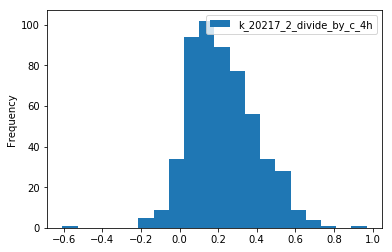

In [25]:
df_k_20217_2_divide_by_c_4h.plot(y='k_20217_2_divide_by_c_4h',kind='hist', bins=20)

#### k_3021_2_minus_c_devide_c_4h

In [26]:
df_k_3021_2_minus_c_devide_c_4h=df_factor1_k[['k_3021_2_minus_c_devide_c_4h','date_']]
df_k_3021_2_minus_c_devide_c_4h=df_k_3021_2_minus_c_devide_c_4h[df_k_3021_2_minus_c_devide_c_4h['k_3021_2_minus_c_devide_c_4h']!=0]
df_k_3021_2_minus_c_devide_c_4h.reset_index(inplace=True,drop=True)
df_k_3021_2_minus_c_devide_c_4h['k_3021_2_minus_c_devide_c_4h'].describe()

count    544.000000
mean       0.105412
std        0.152812
min       -0.304086
25%        0.019585
50%        0.071892
75%        0.160161
max        0.969486
Name: k_3021_2_minus_c_devide_c_4h, dtype: float64

In [27]:
df_k_3021_2_minus_c_devide_c_4h['k_3021_2_minus_c_devide_c_4h'].median()

0.07189210504293442

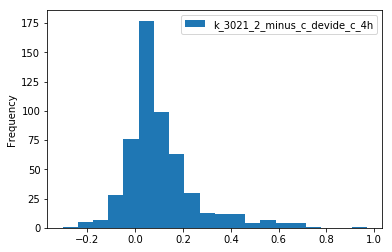

In [28]:
df_k_3021_2_minus_c_devide_c_4h.plot(y='k_3021_2_minus_c_devide_c_4h',kind='hist', bins=20)

#### k_21605_2_diff_4h

In [29]:
df_k_21605_2_diff_4h=df_factor1_k[['k_21605_2_diff_4h','date_']]
df_k_21605_2_diff_4h=df_k_21605_2_diff_4h[df_k_21605_2_diff_4h['k_21605_2_diff_4h']!=0]
df_k_21605_2_diff_4h.reset_index(inplace=True,drop=True)
df_k_21605_2_diff_4h['k_21605_2_diff_4h'].describe()

count    543.000000
mean       0.003121
std        0.005251
min       -0.013448
25%        0.000130
50%        0.001273
75%        0.004583
max        0.036315
Name: k_21605_2_diff_4h, dtype: float64

In [30]:
df_k_21605_2_diff_4h['k_21605_2_diff_4h'].median()

0.0012734223855659366

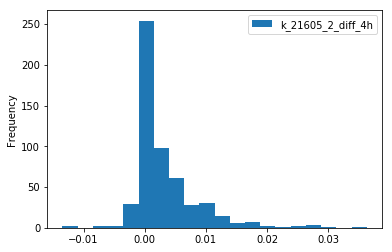

In [31]:
df_k_21605_2_diff_4h.plot(y='k_21605_2_diff_4h',kind='hist', bins=20)

#### k_31430_2_base_4h

In [32]:
df_k_31430_2_base_4h=df_factor1_k[['k_31430_2_base_4h','date_']]
df_k_31430_2_base_4h=df_k_31430_2_base_4h[df_k_31430_2_base_4h['k_31430_2_base_4h']!=0]
df_k_31430_2_base_4h.reset_index(inplace=True,drop=True)
df_k_31430_2_base_4h['k_31430_2_base_4h'].describe()

count    531.000000
mean      -0.008493
std        0.013532
min       -0.075820
25%       -0.014664
50%       -0.005919
75%       -0.000861
max        0.041189
Name: k_31430_2_base_4h, dtype: float64

In [33]:
df_k_31430_2_base_4h['k_31430_2_base_4h'].median()

-0.005919334478676319

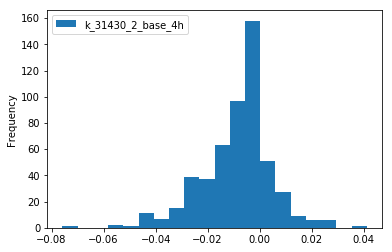

In [34]:
df_k_31430_2_base_4h.plot(y='k_31430_2_base_4h',kind='hist', bins=20)

#### k_alpha_factor

In [35]:
df_k_alpha_factor=df_factor2_k[df_factor2_k['k_alpha_factor']!=0]
df_k_alpha_factor.reset_index(inplace=True,drop=True)
df_k_alpha_factor['k_alpha_factor'].describe()

count    57.000000
mean      0.026108
std       0.015002
min      -0.009071
25%       0.016500
50%       0.023323
75%       0.033215
max       0.065361
Name: k_alpha_factor, dtype: float64

In [36]:
df_k_alpha_factor['k_alpha_factor'].median()

0.023323043865380064

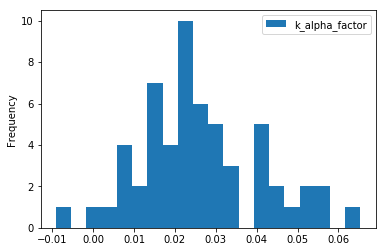

In [37]:
df_k_alpha_factor.plot(y='k_alpha_factor',kind='hist', bins=20)

### 确定系数

In [38]:
series_coef=pd.Series(data=[0.026108, 0.117729, 0.224912, 0.105412, 0.003121, -0.008493],
                      index=['alpha_factor']+factor_index)
series_coef

alpha_factor                   0.026108
20220_2_minus_c_devide_c_4h    0.117729
20217_2_divide_by_c_4h         0.224912
3021_2_minus_c_devide_c_4h     0.105412
21605_2_diff_4h                0.003121
31430_2_base_4h               -0.008493
dtype: float64

In [39]:
# 设定权重25%,20%,20%,15%,10%,10%
# 设定权重40%,20%,20%,20%,0%,0%
series_coef_w=series_coef*[0.4,0.2,0.2,0.2,0.0,0.0]
series_coef_w

alpha_factor                   0.010443
20220_2_minus_c_devide_c_4h    0.023546
20217_2_divide_by_c_4h         0.044982
3021_2_minus_c_devide_c_4h     0.021082
21605_2_diff_4h                0.000000
31430_2_base_4h               -0.000000
dtype: float64

In [40]:
df_reg=df_factor3[['date_','month_','return','AlphaFactor']+factor_index]
df_reg['package_factor']=(df_reg[['AlphaFactor']+factor_index]*list(series_coef_w)).sum(axis=1)
df_reg

,date_,month_,return,AlphaFactor,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h,21605_2_diff_4h,31430_2_base_4h,package_factor
0,20190102,201901,-0.021299,0.039968,0.007455,0.998935,1.667129e-02,0.038099,0.002053,0.045879
1,20190103,201901,0.010893,-0.019371,0.026144,1.001089,2.761496e-02,0.052559,-0.035282,0.046027
2,20190104,201901,0.055195,0.108212,0.009740,1.004329,4.081023e-02,0.098417,-0.000569,0.047397
3,20190107,201901,-0.010163,-0.137846,-0.002033,0.990854,-9.146373e-03,-0.195233,0.177197,0.042891
4,20190108,201901,-0.007194,0.072366,0.011305,1.001028,1.027766e-03,0.102588,-0.003115,0.046072
5,20190109,201901,0.020534,-0.169205,0.000000,0.991786,-8.213568e-03,-0.388634,0.008451,0.042673
6,20190110,201901,0.023303,0.132417,0.021277,1.007092,7.092198e-03,0.455737,-0.008359,0.047335
7,20190111,201901,0.008902,-0.186061,0.008902,0.999011,-9.891356e-04,-0.107256,0.016058,0.043184
8,20190114,201901,-0.010763,-0.278337,-0.000978,0.998043,-1.956867e-03,-0.047349,0.012257,0.041923
9,20190115,201901,0.012859,-0.130204,0.013848,1.000000,0.000000e+00,0.062500,-0.009723,0.043949


In [41]:
cal_ic.cal_general_ic(df_reg,['package_factor'],'return')

General Correlation Results:
********************
The general correlation of package_factor against return is:7.63%


package_factor    0.076274
return            1.000000
Name: return, dtype: float64

In [42]:
cal_ic.cal_panel_ic(df_reg,'date_',['package_factor'],'return')

'date_' Panel Correlation Results:
********************
The correlation of package_factor against return is:18.21%
--------------------


package_factor    0.182121
dtype: float64

In [43]:
cal_ic.cal_panel_ic(df_reg,'month_',['package_factor'],'return')

'month_' Panel Correlation Results:
********************
The correlation of package_factor against return is:10.28%
--------------------


package_factor    0.102765
dtype: float64

## 5因子复现

In [64]:
def cal_factor(dataframe,length=21,save_path='/nfs/public_data/notebooks/alpha/HighFrequency/alpha_day_bar_updated/alpha/'):
    # 20220_2_minus_c_devide_c_4h
    dataframe['20220_2_minus_c_devide_c_4h']=dataframe.apply(lambda x:(x['high_']-x['open_t'])/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)

    # 20217_2_divide_by_c_4h
    dataframe['20217_2_divide_by_c_4h']=dataframe.apply(lambda x:x['close_']/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)

    # 3021_2_minus_c_devide_c_4h
    dataframe['current_value']=dataframe['close_'].shift(length)
    dataframe['current_temp']=dataframe['close_'].shift(length-1)
    dataframe['roll21_max']=dataframe['current_temp'].rolling(length).max()
    dataframe['roll21_min']=dataframe['current_temp'].rolling(length).min()
    dataframe['roll11_max']=dataframe['current_temp'].shift(length//2).rolling(length//2+1).max()
    dataframe['roll11_min']=dataframe['current_temp'].shift(length//2).rolling(length//2+1).min()
    dataframe['roll10_max']=dataframe['current_temp'].rolling(length//2).max()
    dataframe['roll10_min']=dataframe['current_temp'].rolling(length//2).min()
    dataframe['n3']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll21_max'])-min(x['current_temp'],x['roll21_min']))/length,axis=1)
    dataframe['n2']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll11_max'])-min(x['current_temp'],x['roll11_min']))/length*2,axis=1)
    dataframe['n1']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll10_max'])-min(x['current_temp'],x['roll10_min']))/length*2,axis=1)
    dataframe['alpha']=dataframe.apply(lambda x:np.exp(-4.6*((np.log(x['n1']+x['n2'])-np.log(x['n3']))/np.log(2)-1)) if x['n1']>0.0001 and x['n2']>0.0001 and x['n3']>0.0001 else np.nan,axis=1)
    dataframe['current_adj']=dataframe['alpha']*dataframe['close_']+dataframe['current_value']*(1-dataframe['alpha'])
    dataframe['current_adj'].iloc[0:2*length-1]=dataframe['close_'].iloc[0:2*length-1]
    dataframe['3021_2_minus_c_devide_c_4h']=dataframe.apply(lambda x:x['current_adj']/x['open_t']-1 if x['open_t']!=0 else 0,axis=1)
    
    return dataframe[['Code_','date_','open_','high_','low_','close_','open_t','close_t','ratio','20220_2_minus_c_devide_c_4h','20217_2_divide_by_c_4h','3021_2_minus_c_devide_c_4h']]
    # 21605_2_diff_4h， 31430_2_base_4h 因子有误，废弃
    # length=14
    # dataframe['21605_2_diff_4h_temp']=dataframe.apply(lambda x:(x['close_']-0.5*(x['open_']+x['close_']))/(x['high_']-x['low_']) if x['high_']!=x['low_'] else 0,axis=1)
    # dataframe['21605_2_diff_4h']=dataframe['21605_2_diff_4h_temp']-dataframe['21605_2_diff_4h_temp'].shift(1)
    # dataframe['31430_2_base_4h_temp']=dataframe.apply(lambda x:(3*x['open_t']-x['open_']-x['high_']-x['low_'])/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)
    # dataframe['31430_2_base_4h']=(dataframe['volume_']/dataframe['volume_'].shift((length-1)))*dataframe['31430_2_base_4h_temp']
    

In [45]:
# test=pd.read_csv('/nfs/public_data/notebooks/alpha/HighFrequency/alpha_day_bar/csv/000001.csv')
# test

# # 20220_2_minus_c_devide_c_4h
# test['20220_2_minus_c_devide_c_4h']=test.apply(lambda x:(x['high_']-x['open_t'])/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)

# # 20217_2_divide_by_c_4h
# test['20217_2_divide_by_c_4h']=test.apply(lambda x:x['close_']/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)

# # 3021_2_minus_c_devide_c_4h
# length=21
# test['current_value']=test['close_'].shift(length)
# test['current_temp']=test['close_'].shift(length-1)
# test['roll21_max']=test['current_temp'].rolling(length).max()
# test['roll21_min']=test['current_temp'].rolling(length).min()
# test['roll11_max']=test['current_temp'].shift(length//2).rolling(length//2+1).max()
# test['roll11_min']=test['current_temp'].shift(length//2).rolling(length//2+1).min()
# test['roll10_max']=test['current_temp'].rolling(length//2).max()
# test['roll10_min']=test['current_temp'].rolling(length//2).min()
# test['n3']=test.apply(lambda x:(max(x['current_temp'],x['roll21_max'])-min(x['current_temp'],x['roll21_min']))/length,axis=1)
# test['n2']=test.apply(lambda x:(max(x['current_temp'],x['roll11_max'])-min(x['current_temp'],x['roll11_min']))/length*2,axis=1)
# test['n1']=test.apply(lambda x:(max(x['current_temp'],x['roll10_max'])-min(x['current_temp'],x['roll10_min']))/length*2,axis=1)
# test['alpha']=test.apply(lambda x:np.exp(-4.6*((np.log(x['n1']+x['n2'])-np.log(x['n3']))/np.log(2)-1)) if x['n1']>0.0001 and x['n2']>0.0001 and x['n3']>0.0001 else np.nan,axis=1)
# test['current_adj']=test['alpha']*test['close_']+test['current_value']*(1-test['alpha'])
# test['current_adj'].iloc[0:2*length-1]=test['close_'].iloc[0:2*length-1]
# test['3021_2_minus_c_devide_c_4h']=test.apply(lambda x:x['current_adj']/x['open_t']-1 if x['open_t']!=0 else 0,axis=1)


# # 21605_2_diff_4h， 31430_2_base_4h 因子有误，废弃
# # length=14
# # test['21605_2_diff_4h_temp']=test.apply(lambda x:(x['close_']-0.5*(x['open_']+x['close_']))/(x['high_']-x['low_']) if x['high_']!=x['low_'] else 0,axis=1)
# # test['21605_2_diff_4h']=test['21605_2_diff_4h_temp']-test['21605_2_diff_4h_temp'].shift(1)
# # test['31430_2_base_4h_temp']=test.apply(lambda x:(3*x['open_t']-x['open_']-x['high_']-x['low_'])/x['open_t'] if x['open_t']>0.0001 else np.nan,axis=1)
# # test['31430_2_base_4h']=(test['volume_']/test['volume_'].shift((length-1)))*test['31430_2_base_4h_temp']

# test[['20220_2_minus_c_devide_c_4h','20217_2_divide_by_c_4h','3021_2_minus_c_devide_c_4h','date_']]

## 业绩分析

### 保存聚源daily数据

In [46]:
# 分钟数据清洗出的daily数据，截止07/31
daily1_cwd='/nfs/public_data/notebooks/alpha/HighFrequency/stock_1D/'
# 聚源提取daily数据
daily2_cwd='/nfs/public_data/notebooks/alpha/HighFrequency/stock_gildata/'

In [47]:
conn = pymysql.connect(host='192.168.1.22', port=3306, user='zhanzhaorui',
                       password='123456', charset='utf8', use_unicode=True)
sql ="select TradingDay, SecuCode, OpenPrice, HighPrice, LowPrice, ClosePrice, PrevClosePrice, SecuAbbr, adj_factor \
    from (select TradingDay, SecuCode, OpenPrice, HighPrice, LowPrice, ClosePrice, PrevClosePrice, SecuAbbr \
        from gildata.QT_DailyQuote as a \
        left join gildata.SecuMain as b \
        on a.InnerCode = b.InnerCode \
        where SecuMarket in (83, 90) and SecuCategory = 1 \
            and TradingDay>='2019-07-31' \
        ) as x \
    left join \
        (select * from hmalpha.DailyAdjFactors) as y \
    on x.TradingDay=y.date and x.SecuCode=y.symbol"
df_daily = pd.read_sql(sql, con=conn)
df_daily

,TradingDay,SecuCode,OpenPrice,HighPrice,LowPrice,ClosePrice,PrevClosePrice,SecuAbbr,adj_factor
0,2019-07-31,000001,14.30,14.32,14.08,14.13,14.37,平安银行,102.87500
1,2019-08-01,000001,14.06,14.19,13.94,14.10,14.13,平安银行,102.87500
2,2019-08-02,000001,13.77,13.88,13.66,13.74,14.10,平安银行,102.87500
3,2019-08-05,000001,13.60,13.64,13.27,13.35,13.74,平安银行,102.87500
4,2019-08-06,000001,13.10,13.46,13.03,13.37,13.35,平安银行,102.87500
5,2019-08-07,000001,13.49,13.64,13.37,13.54,13.37,平安银行,102.87500
6,2019-08-08,000001,13.90,14.50,13.85,14.38,13.54,平安银行,102.87500
7,2019-08-09,000001,14.55,14.85,14.43,14.52,14.38,平安银行,102.87500
8,2019-08-12,000001,14.61,15.12,14.60,15.12,14.52,平安银行,102.87500
9,2019-08-13,000001,15.00,15.08,14.74,14.89,15.12,平安银行,102.87500


In [51]:
gilstock_list=df_daily['SecuCode'].drop_duplicates()
left=len(gilstock_list)

for stock in gilstock_list:
    df=df_daily[df_daily['SecuCode']==stock]
    df['date_']=df['TradingDay'].apply(lambda x:int(dt.datetime.strftime(x,'%Y%m%d')))
    df.to_csv(daily2_cwd+stock+'.csv',index=False)
    left-=1
    print('{} is added, {} to go'.format(stock,left))

000001 is added, 3646 to go
000002 is added, 3645 to go
000004 is added, 3644 to go
000005 is added, 3643 to go
000006 is added, 3642 to go
000007 is added, 3641 to go
000008 is added, 3640 to go
000009 is added, 3639 to go
000010 is added, 3638 to go
000011 is added, 3637 to go
000012 is added, 3636 to go
000014 is added, 3635 to go
000016 is added, 3634 to go
000017 is added, 3633 to go
000018 is added, 3632 to go
000019 is added, 3631 to go
000020 is added, 3630 to go
000021 is added, 3629 to go
001872 is added, 3628 to go
000023 is added, 3627 to go
000025 is added, 3626 to go
000026 is added, 3625 to go
000027 is added, 3624 to go
000028 is added, 3623 to go
000029 is added, 3622 to go
000030 is added, 3621 to go
000031 is added, 3620 to go
000032 is added, 3619 to go
000034 is added, 3618 to go
000035 is added, 3617 to go
000036 is added, 3616 to go
000037 is added, 3615 to go
000038 is added, 3614 to go
000039 is added, 3613 to go
000040 is added, 3612 to go
000042 is added, 361

000768 is added, 3352 to go
000776 is added, 3351 to go
000777 is added, 3350 to go
000778 is added, 3349 to go
000779 is added, 3348 to go
000780 is added, 3347 to go
000782 is added, 3346 to go
000783 is added, 3345 to go
000785 is added, 3344 to go
000786 is added, 3343 to go
000788 is added, 3342 to go
000789 is added, 3341 to go
000790 is added, 3340 to go
000791 is added, 3339 to go
000792 is added, 3338 to go
000793 is added, 3337 to go
000795 is added, 3336 to go
000796 is added, 3335 to go
000797 is added, 3334 to go
000798 is added, 3333 to go
000799 is added, 3332 to go
000800 is added, 3331 to go
000801 is added, 3330 to go
000802 is added, 3329 to go
000803 is added, 3328 to go
000806 is added, 3327 to go
000807 is added, 3326 to go
000809 is added, 3325 to go
000810 is added, 3324 to go
000811 is added, 3323 to go
000812 is added, 3322 to go
000813 is added, 3321 to go
000815 is added, 3320 to go
000816 is added, 3319 to go
000818 is added, 3318 to go
000819 is added, 331

600167 is added, 3059 to go
600168 is added, 3058 to go
600169 is added, 3057 to go
600170 is added, 3056 to go
600171 is added, 3055 to go
600172 is added, 3054 to go
600173 is added, 3053 to go
600175 is added, 3052 to go
600176 is added, 3051 to go
600177 is added, 3050 to go
600178 is added, 3049 to go
600179 is added, 3048 to go
600180 is added, 3047 to go
600182 is added, 3046 to go
600183 is added, 3045 to go
600184 is added, 3044 to go
600185 is added, 3043 to go
600186 is added, 3042 to go
600187 is added, 3041 to go
600188 is added, 3040 to go
600189 is added, 3039 to go
600190 is added, 3038 to go
600191 is added, 3037 to go
600192 is added, 3036 to go
600193 is added, 3035 to go
600195 is added, 3034 to go
600196 is added, 3033 to go
600197 is added, 3032 to go
600198 is added, 3031 to go
600199 is added, 3030 to go
600200 is added, 3029 to go
600201 is added, 3028 to go
600202 is added, 3027 to go
600203 is added, 3026 to go
600206 is added, 3025 to go
600207 is added, 302

600532 is added, 2766 to go
600533 is added, 2765 to go
600535 is added, 2764 to go
600536 is added, 2763 to go
600537 is added, 2762 to go
600538 is added, 2761 to go
600539 is added, 2760 to go
600540 is added, 2759 to go
600543 is added, 2758 to go
600545 is added, 2757 to go
600546 is added, 2756 to go
600547 is added, 2755 to go
600548 is added, 2754 to go
600549 is added, 2753 to go
600550 is added, 2752 to go
600551 is added, 2751 to go
600552 is added, 2750 to go
600555 is added, 2749 to go
600556 is added, 2748 to go
600557 is added, 2747 to go
600558 is added, 2746 to go
600559 is added, 2745 to go
600560 is added, 2744 to go
600561 is added, 2743 to go
600562 is added, 2742 to go
600563 is added, 2741 to go
600565 is added, 2740 to go
600566 is added, 2739 to go
600567 is added, 2738 to go
600568 is added, 2737 to go
600569 is added, 2736 to go
600570 is added, 2735 to go
600571 is added, 2734 to go
600572 is added, 2733 to go
600573 is added, 2732 to go
600575 is added, 273

600861 is added, 2472 to go
600862 is added, 2471 to go
600863 is added, 2470 to go
600864 is added, 2469 to go
600865 is added, 2468 to go
600866 is added, 2467 to go
600867 is added, 2466 to go
600868 is added, 2465 to go
600869 is added, 2464 to go
600870 is added, 2463 to go
600871 is added, 2462 to go
600872 is added, 2461 to go
600873 is added, 2460 to go
600874 is added, 2459 to go
600875 is added, 2458 to go
600876 is added, 2457 to go
600877 is added, 2456 to go
600879 is added, 2455 to go
600880 is added, 2454 to go
600881 is added, 2453 to go
600882 is added, 2452 to go
600883 is added, 2451 to go
600884 is added, 2450 to go
600885 is added, 2449 to go
600886 is added, 2448 to go
600887 is added, 2447 to go
600888 is added, 2446 to go
600889 is added, 2445 to go
600890 is added, 2444 to go
600891 is added, 2443 to go
600892 is added, 2442 to go
600893 is added, 2441 to go
600894 is added, 2440 to go
600895 is added, 2439 to go
600896 is added, 2438 to go
600897 is added, 243

601857 is added, 2177 to go
002188 is added, 2176 to go
002187 is added, 2175 to go
002186 is added, 2174 to go
002196 is added, 2173 to go
002208 is added, 2172 to go
002193 is added, 2171 to go
002190 is added, 2170 to go
002191 is added, 2169 to go
002194 is added, 2168 to go
002195 is added, 2167 to go
300213 is added, 2166 to go
002200 is added, 2165 to go
002199 is added, 2164 to go
002198 is added, 2163 to go
601390 is added, 2162 to go
601918 is added, 2161 to go
002197 is added, 2160 to go
002201 is added, 2159 to go
002203 is added, 2158 to go
601999 is added, 2157 to go
002202 is added, 2156 to go
601866 is added, 2155 to go
002204 is added, 2154 to go
002205 is added, 2153 to go
601601 is added, 2152 to go
002207 is added, 2151 to go
002206 is added, 2150 to go
002209 is added, 2149 to go
002210 is added, 2148 to go
002211 is added, 2147 to go
002213 is added, 2146 to go
601099 is added, 2145 to go
002212 is added, 2144 to go
002216 is added, 2143 to go
601899 is added, 214

300050 is added, 1884 to go
300044 is added, 1883 to go
300046 is added, 1882 to go
300043 is added, 1881 to go
603199 is added, 1880 to go
002383 is added, 1879 to go
002363 is added, 1878 to go
002379 is added, 1877 to go
002382 is added, 1876 to go
002421 is added, 1875 to go
300277 is added, 1874 to go
300051 is added, 1873 to go
002392 is added, 1872 to go
002630 is added, 1871 to go
002385 is added, 1870 to go
002384 is added, 1869 to go
002386 is added, 1868 to go
002377 is added, 1867 to go
300052 is added, 1866 to go
300054 is added, 1865 to go
300264 is added, 1864 to go
002394 is added, 1863 to go
002393 is added, 1862 to go
601158 is added, 1861 to go
002388 is added, 1860 to go
300053 is added, 1859 to go
300057 is added, 1858 to go
300055 is added, 1857 to go
300056 is added, 1856 to go
300058 is added, 1855 to go
002407 is added, 1854 to go
002387 is added, 1853 to go
002395 is added, 1852 to go
002389 is added, 1851 to go
002398 is added, 1850 to go
002390 is added, 184

300146 is added, 1591 to go
300149 is added, 1590 to go
002743 is added, 1589 to go
002547 is added, 1588 to go
300155 is added, 1587 to go
300151 is added, 1586 to go
002606 is added, 1585 to go
002524 is added, 1584 to go
002528 is added, 1583 to go
300147 is added, 1582 to go
300153 is added, 1581 to go
002526 is added, 1580 to go
002532 is added, 1579 to go
002534 is added, 1578 to go
002531 is added, 1577 to go
300169 is added, 1576 to go
300162 is added, 1575 to go
300161 is added, 1574 to go
002540 is added, 1573 to go
002702 is added, 1572 to go
002567 is added, 1571 to go
601933 is added, 1570 to go
300191 is added, 1569 to go
300159 is added, 1568 to go
300165 is added, 1567 to go
300223 is added, 1566 to go
002535 is added, 1565 to go
002609 is added, 1564 to go
300164 is added, 1563 to go
300163 is added, 1562 to go
300160 is added, 1561 to go
002536 is added, 1560 to go
002557 is added, 1559 to go
002539 is added, 1558 to go
601890 is added, 1557 to go
002533 is added, 155

002651 is added, 1298 to go
603599 is added, 1297 to go
300324 is added, 1296 to go
300350 is added, 1295 to go
300287 is added, 1294 to go
300290 is added, 1293 to go
601360 is added, 1292 to go
002649 is added, 1291 to go
002664 is added, 1290 to go
300298 is added, 1289 to go
002655 is added, 1288 to go
002656 is added, 1287 to go
601368 is added, 1286 to go
601336 is added, 1285 to go
002667 is added, 1284 to go
300289 is added, 1283 to go
300532 is added, 1282 to go
300483 is added, 1281 to go
002662 is added, 1280 to go
002688 is added, 1279 to go
300291 is added, 1278 to go
002652 is added, 1277 to go
603729 is added, 1276 to go
300297 is added, 1275 to go
002650 is added, 1274 to go
300292 is added, 1273 to go
002666 is added, 1272 to go
601929 is added, 1271 to go
300358 is added, 1270 to go
300310 is added, 1269 to go
300307 is added, 1268 to go
002654 is added, 1267 to go
603359 is added, 1266 to go
002653 is added, 1265 to go
601339 is added, 1264 to go
300309 is added, 126

300415 is added, 1005 to go
300530 is added, 1004 to go
300417 is added, 1003 to go
300452 is added, 1002 to go
002740 is added, 1001 to go
603369 is added, 1000 to go
603011 is added, 999 to go
603698 is added, 998 to go
601021 is added, 997 to go
603726 is added, 996 to go
603320 is added, 995 to go
603013 is added, 994 to go
002768 is added, 993 to go
603015 is added, 992 to go
603606 is added, 991 to go
603959 is added, 990 to go
603696 is added, 989 to go
002730 is added, 988 to go
002761 is added, 987 to go
002791 is added, 986 to go
002732 is added, 985 to go
603368 is added, 984 to go
601828 is added, 983 to go
300463 is added, 982 to go
300523 is added, 981 to go
002742 is added, 980 to go
300455 is added, 979 to go
603318 is added, 978 to go
300449 is added, 977 to go
300443 is added, 976 to go
300398 is added, 975 to go
603116 is added, 974 to go
603866 is added, 973 to go
002786 is added, 972 to go
603730 is added, 971 to go
600959 is added, 970 to go
002776 is added, 969 t

300543 is added, 701 to go
300531 is added, 700 to go
300570 is added, 699 to go
600977 is added, 698 to go
603300 is added, 697 to go
603598 is added, 696 to go
603019 is added, 695 to go
603689 is added, 694 to go
002816 is added, 693 to go
603519 is added, 692 to go
002785 is added, 691 to go
603067 is added, 690 to go
300665 is added, 689 to go
300573 is added, 688 to go
300428 is added, 687 to go
603601 is added, 686 to go
002835 is added, 685 to go
601878 is added, 684 to go
603886 is added, 683 to go
603858 is added, 682 to go
002736 is added, 681 to go
603345 is added, 680 to go
300426 is added, 679 to go
002765 is added, 678 to go
002810 is added, 677 to go
300434 is added, 676 to go
300539 is added, 675 to go
300488 is added, 674 to go
603808 is added, 673 to go
603737 is added, 672 to go
603778 is added, 671 to go
300439 is added, 670 to go
603398 is added, 669 to go
603223 is added, 668 to go
603016 is added, 667 to go
300450 is added, 666 to go
300502 is added, 665 to go
3

002866 is added, 397 to go
603970 is added, 396 to go
002935 is added, 395 to go
002877 is added, 394 to go
002900 is added, 393 to go
002880 is added, 392 to go
603063 is added, 391 to go
002886 is added, 390 to go
603387 is added, 389 to go
002879 is added, 388 to go
603196 is added, 387 to go
603978 is added, 386 to go
601108 is added, 385 to go
603042 is added, 384 to go
603587 is added, 383 to go
002893 is added, 382 to go
603725 is added, 381 to go
603985 is added, 380 to go
603619 is added, 379 to go
603157 is added, 378 to go
603938 is added, 377 to go
603711 is added, 376 to go
603880 is added, 375 to go
002884 is added, 374 to go
603767 is added, 373 to go
603079 is added, 372 to go
300622 is added, 371 to go
300611 is added, 370 to go
300609 is added, 369 to go
300767 is added, 368 to go
300708 is added, 367 to go
300625 is added, 366 to go
300621 is added, 365 to go
300661 is added, 364 to go
300627 is added, 363 to go
300626 is added, 362 to go
300620 is added, 361 to go
3

603297 is added, 92 to go
300757 is added, 91 to go
300694 is added, 90 to go
603650 is added, 89 to go
002940 is added, 88 to go
002937 is added, 87 to go
300759 is added, 86 to go
603629 is added, 85 to go
603810 is added, 84 to go
603876 is added, 83 to go
603527 is added, 82 to go
603713 is added, 81 to go
300753 is added, 80 to go
603739 is added, 79 to go
603121 is added, 78 to go
603192 is added, 77 to go
300775 is added, 76 to go
002941 is added, 75 to go
601236 is added, 74 to go
603790 is added, 73 to go
603915 is added, 72 to go
603277 is added, 71 to go
603657 is added, 70 to go
603662 is added, 69 to go
300748 is added, 68 to go
603259 is added, 67 to go
300776 is added, 66 to go
300654 is added, 65 to go
300705 is added, 64 to go
603080 is added, 63 to go
603697 is added, 62 to go
300454 is added, 61 to go
603937 is added, 60 to go
300716 is added, 59 to go
600933 is added, 58 to go
300766 is added, 57 to go
601319 is added, 56 to go
002952 is added, 55 to go
002946 is ad

### 对接清洗自分钟数据的daily数据，整合复权因子

In [52]:
data_list_til0731={x.split('.')[0][2:] for x in os.listdir(daily1_cwd) if x[0:2].isupper()}
data_list_gildata={x.split('.')[0] for x in os.listdir(daily2_cwd)}
data_list_available=list(data_list_til0731&data_list_gildata)
left=len(data_list_available)
alpha_day_bar_updated_cwd='/nfs/public_data/notebooks/alpha/HighFrequency/alpha_day_bar_updated/csv/'
for stock in data_list_available:
    stock1='SH'+stock if stock[:2]=='60' else 'SZ'+stock
    df_daily1=pd.read_csv(daily1_cwd+stock1+'.csv')
    df_daily1=df_daily1[['date_','open_','high_','low_','close_','ratio']]
    df_daily1_factor=float(df_daily1['ratio'].tail(1))
    
    df_daily2=pd.read_csv(daily2_cwd+stock+'.csv')
    df_daily2=df_daily2[df_daily2['date_']>=20190731]
    df_daily2_factor=float(df_daily2['adj_factor'].head(1))
    
    factor_relation=df_daily1_factor/df_daily2_factor
    
    df_daily2=df_daily2[['date_','OpenPrice','HighPrice','LowPrice','ClosePrice','adj_factor']]
    df_daily2['ratio']=df_daily2['adj_factor']*factor_relation
    df_daily2[['open_','high_','low_','close_']]=df_daily2[['OpenPrice','HighPrice','LowPrice','ClosePrice']].multiply(df_daily2['ratio'].apply(lambda x:x**2),axis='index')
    
    df_daily_adj=pd.concat([df_daily1,df_daily2],axis=0,join='inner')
    df_daily_adj['Code_']=stock
    # 匹配YBB逻辑，open_,high_,low_,close_为T-1数据，open_t,close_t为T数据
    df_daily_adj[['date_','open_t','close_t']]=df_daily_adj[['date_','open_','close_']].shift(-1)
    df_daily_adj.dropna(subset=['date_'],inplace=True)
    df_daily_adj.reset_index(inplace=True,drop=True)
    df_daily_adj.to_csv(alpha_day_bar_updated_cwd+stock+'.csv',index=False)
    left-=1
    print('{} is added, {} to go'.format(stock,left))

603677 is added, 3639 to go
600018 is added, 3638 to go
603086 is added, 3637 to go
300084 is added, 3636 to go
603879 is added, 3635 to go
300305 is added, 3634 to go
300191 is added, 3633 to go
002304 is added, 3632 to go
300086 is added, 3631 to go
603587 is added, 3630 to go
600068 is added, 3629 to go
000917 is added, 3628 to go
600660 is added, 3627 to go
603699 is added, 3626 to go
603600 is added, 3625 to go
600836 is added, 3624 to go
603515 is added, 3623 to go
002392 is added, 3622 to go
000031 is added, 3621 to go
600652 is added, 3620 to go
002797 is added, 3619 to go
600197 is added, 3618 to go
600987 is added, 3617 to go
002231 is added, 3616 to go
603985 is added, 3615 to go
300434 is added, 3614 to go
002698 is added, 3613 to go
002630 is added, 3612 to go
603111 is added, 3611 to go
300307 is added, 3610 to go
600818 is added, 3609 to go
603877 is added, 3608 to go
600724 is added, 3607 to go
300437 is added, 3606 to go
000017 is added, 3605 to go
002822 is added, 360

600335 is added, 3345 to go
000159 is added, 3344 to go
300719 is added, 3343 to go
600960 is added, 3342 to go
601186 is added, 3341 to go
300407 is added, 3340 to go
600365 is added, 3339 to go
600569 is added, 3338 to go
300220 is added, 3337 to go
002505 is added, 3336 to go
002695 is added, 3335 to go
002080 is added, 3334 to go
300002 is added, 3333 to go
000413 is added, 3332 to go
603101 is added, 3331 to go
603823 is added, 3330 to go
600891 is added, 3329 to go
300436 is added, 3328 to go
600209 is added, 3327 to go
002273 is added, 3326 to go
600978 is added, 3325 to go
300481 is added, 3324 to go
601579 is added, 3323 to go
002284 is added, 3322 to go
300026 is added, 3321 to go
601718 is added, 3320 to go
300199 is added, 3319 to go
002213 is added, 3318 to go
600757 is added, 3317 to go
002931 is added, 3316 to go
600917 is added, 3315 to go
600864 is added, 3314 to go
002238 is added, 3313 to go
600468 is added, 3312 to go
000976 is added, 3311 to go
600851 is added, 331

002631 is added, 3051 to go
600131 is added, 3050 to go
600488 is added, 3049 to go
600791 is added, 3048 to go
002394 is added, 3047 to go
600029 is added, 3046 to go
600847 is added, 3045 to go
300161 is added, 3044 to go
600069 is added, 3043 to go
300534 is added, 3042 to go
300494 is added, 3041 to go
603825 is added, 3040 to go
603477 is added, 3039 to go
300439 is added, 3038 to go
600499 is added, 3037 to go
000430 is added, 3036 to go
600965 is added, 3035 to go
600004 is added, 3034 to go
000510 is added, 3033 to go
600624 is added, 3032 to go
603055 is added, 3031 to go
601566 is added, 3030 to go
002350 is added, 3029 to go
600784 is added, 3028 to go
002522 is added, 3027 to go
300188 is added, 3026 to go
603488 is added, 3025 to go
002610 is added, 3024 to go
600844 is added, 3023 to go
600408 is added, 3022 to go
002927 is added, 3021 to go
000530 is added, 3020 to go
600803 is added, 3019 to go
002268 is added, 3018 to go
300723 is added, 3017 to go
300509 is added, 301

600237 is added, 2757 to go
603136 is added, 2756 to go
603110 is added, 2755 to go
600903 is added, 2754 to go
000848 is added, 2753 to go
300419 is added, 2752 to go
002369 is added, 2751 to go
000733 is added, 2750 to go
600783 is added, 2749 to go
600809 is added, 2748 to go
603098 is added, 2747 to go
600658 is added, 2746 to go
603757 is added, 2745 to go
000650 is added, 2744 to go
000554 is added, 2743 to go
600577 is added, 2742 to go
000756 is added, 2741 to go
601886 is added, 2740 to go
300296 is added, 2739 to go
600697 is added, 2738 to go
600547 is added, 2737 to go
300616 is added, 2736 to go
002745 is added, 2735 to go
603123 is added, 2734 to go
600272 is added, 2733 to go
300003 is added, 2732 to go
603332 is added, 2731 to go
603712 is added, 2730 to go
600735 is added, 2729 to go
002056 is added, 2728 to go
603416 is added, 2727 to go
600340 is added, 2726 to go
002378 is added, 2725 to go
002033 is added, 2724 to go
600597 is added, 2723 to go
300430 is added, 272

002564 is added, 2463 to go
002857 is added, 2462 to go
300519 is added, 2461 to go
300027 is added, 2460 to go
300041 is added, 2459 to go
000661 is added, 2458 to go
300671 is added, 2457 to go
300165 is added, 2456 to go
002241 is added, 2455 to go
002879 is added, 2454 to go
603869 is added, 2453 to go
601228 is added, 2452 to go
002705 is added, 2451 to go
600770 is added, 2450 to go
002062 is added, 2449 to go
002307 is added, 2448 to go
300548 is added, 2447 to go
600228 is added, 2446 to go
600148 is added, 2445 to go
600354 is added, 2444 to go
600461 is added, 2443 to go
600850 is added, 2442 to go
002009 is added, 2441 to go
000686 is added, 2440 to go
300422 is added, 2439 to go
000785 is added, 2438 to go
000020 is added, 2437 to go
300472 is added, 2436 to go
600039 is added, 2435 to go
300157 is added, 2434 to go
000792 is added, 2433 to go
300466 is added, 2432 to go
002619 is added, 2431 to go
000858 is added, 2430 to go
600301 is added, 2429 to go
300621 is added, 242

002493 is added, 2169 to go
002224 is added, 2168 to go
600634 is added, 2167 to go
002773 is added, 2166 to go
601211 is added, 2165 to go
000990 is added, 2164 to go
600157 is added, 2163 to go
601339 is added, 2162 to go
002739 is added, 2161 to go
002819 is added, 2160 to go
601858 is added, 2159 to go
300052 is added, 2158 to go
002496 is added, 2157 to go
300341 is added, 2156 to go
603538 is added, 2155 to go
000566 is added, 2154 to go
600880 is added, 2153 to go
002092 is added, 2152 to go
600302 is added, 2151 to go
300136 is added, 2150 to go
002953 is added, 2149 to go
601888 is added, 2148 to go
300559 is added, 2147 to go
300171 is added, 2146 to go
300383 is added, 2145 to go
002936 is added, 2144 to go
300757 is added, 2143 to go
603283 is added, 2142 to go
600377 is added, 2141 to go
600776 is added, 2140 to go
000066 is added, 2139 to go
600635 is added, 2138 to go
002340 is added, 2137 to go
002677 is added, 2136 to go
600067 is added, 2135 to go
002772 is added, 213

600846 is added, 1876 to go
600714 is added, 1875 to go
000632 is added, 1874 to go
600185 is added, 1873 to go
002129 is added, 1872 to go
300392 is added, 1871 to go
002354 is added, 1870 to go
000676 is added, 1869 to go
000552 is added, 1868 to go
600758 is added, 1867 to go
600260 is added, 1866 to go
600153 is added, 1865 to go
002176 is added, 1864 to go
000973 is added, 1863 to go
601238 is added, 1862 to go
002050 is added, 1861 to go
002309 is added, 1860 to go
600486 is added, 1859 to go
600705 is added, 1858 to go
000060 is added, 1857 to go
002640 is added, 1856 to go
300660 is added, 1855 to go
600872 is added, 1854 to go
300164 is added, 1853 to go
600429 is added, 1852 to go
002509 is added, 1851 to go
002240 is added, 1850 to go
300763 is added, 1849 to go
603637 is added, 1848 to go
002611 is added, 1847 to go
002726 is added, 1846 to go
000732 is added, 1845 to go
000029 is added, 1844 to go
603306 is added, 1843 to go
002664 is added, 1842 to go
000518 is added, 184

002200 is added, 1583 to go
000001 is added, 1582 to go
600615 is added, 1581 to go
300536 is added, 1580 to go
300416 is added, 1579 to go
601128 is added, 1578 to go
300591 is added, 1577 to go
300667 is added, 1576 to go
300301 is added, 1575 to go
002011 is added, 1574 to go
002580 is added, 1573 to go
002587 is added, 1572 to go
603977 is added, 1571 to go
601188 is added, 1570 to go
300676 is added, 1569 to go
600854 is added, 1568 to go
600731 is added, 1567 to go
300706 is added, 1566 to go
000613 is added, 1565 to go
002586 is added, 1564 to go
603997 is added, 1563 to go
002108 is added, 1562 to go
300278 is added, 1561 to go
603337 is added, 1560 to go
603421 is added, 1559 to go
300581 is added, 1558 to go
002825 is added, 1557 to go
603223 is added, 1556 to go
600713 is added, 1555 to go
300603 is added, 1554 to go
600217 is added, 1553 to go
600509 is added, 1552 to go
000793 is added, 1551 to go
600667 is added, 1550 to go
002371 is added, 1549 to go
600208 is added, 154

300733 is added, 1289 to go
600469 is added, 1288 to go
002054 is added, 1287 to go
600137 is added, 1286 to go
603658 is added, 1285 to go
600062 is added, 1284 to go
600889 is added, 1283 to go
603010 is added, 1282 to go
002468 is added, 1281 to go
002488 is added, 1280 to go
300735 is added, 1279 to go
603650 is added, 1278 to go
600388 is added, 1277 to go
600764 is added, 1276 to go
300294 is added, 1275 to go
600133 is added, 1274 to go
600556 is added, 1273 to go
300043 is added, 1272 to go
300641 is added, 1271 to go
603607 is added, 1270 to go
002691 is added, 1269 to go
002595 is added, 1268 to go
300623 is added, 1267 to go
000688 is added, 1266 to go
000949 is added, 1265 to go
300596 is added, 1264 to go
002192 is added, 1263 to go
000673 is added, 1262 to go
300115 is added, 1261 to go
603709 is added, 1260 to go
603937 is added, 1259 to go
002103 is added, 1258 to go
002524 is added, 1257 to go
002318 is added, 1256 to go
600085 is added, 1255 to go
000923 is added, 125

000423 is added, 995 to go
002947 is added, 994 to go
300669 is added, 993 to go
002902 is added, 992 to go
600479 is added, 991 to go
603286 is added, 990 to go
601636 is added, 989 to go
002666 is added, 988 to go
600706 is added, 987 to go
601928 is added, 986 to go
600313 is added, 985 to go
600406 is added, 984 to go
300357 is added, 983 to go
600578 is added, 982 to go
002187 is added, 981 to go
002423 is added, 980 to go
300193 is added, 979 to go
002672 is added, 978 to go
000059 is added, 977 to go
603871 is added, 976 to go
002398 is added, 975 to go
300490 is added, 974 to go
000023 is added, 973 to go
300304 is added, 972 to go
603915 is added, 971 to go
000809 is added, 970 to go
603713 is added, 969 to go
002779 is added, 968 to go
603690 is added, 967 to go
000671 is added, 966 to go
603020 is added, 965 to go
000985 is added, 964 to go
600873 is added, 963 to go
300615 is added, 962 to go
002774 is added, 961 to go
000558 is added, 960 to go
000680 is added, 959 to go
6

300647 is added, 691 to go
600139 is added, 690 to go
000797 is added, 689 to go
300395 is added, 688 to go
603517 is added, 687 to go
002335 is added, 686 to go
300571 is added, 685 to go
601989 is added, 684 to go
002259 is added, 683 to go
300240 is added, 682 to go
600629 is added, 681 to go
600300 is added, 680 to go
601212 is added, 679 to go
600021 is added, 678 to go
300605 is added, 677 to go
002515 is added, 676 to go
600216 is added, 675 to go
000972 is added, 674 to go
603316 is added, 673 to go
600962 is added, 672 to go
002395 is added, 671 to go
300386 is added, 670 to go
002383 is added, 669 to go
000957 is added, 668 to go
000776 is added, 667 to go
600360 is added, 666 to go
002247 is added, 665 to go
002538 is added, 664 to go
300254 is added, 663 to go
000981 is added, 662 to go
601999 is added, 661 to go
002654 is added, 660 to go
002702 is added, 659 to go
002457 is added, 658 to go
600284 is added, 657 to go
002767 is added, 656 to go
000681 is added, 655 to go
0

600328 is added, 387 to go
600273 is added, 386 to go
603496 is added, 385 to go
300569 is added, 384 to go
000611 is added, 383 to go
600732 is added, 382 to go
300417 is added, 381 to go
002634 is added, 380 to go
603188 is added, 379 to go
300661 is added, 378 to go
300580 is added, 377 to go
600012 is added, 376 to go
300053 is added, 375 to go
002462 is added, 374 to go
603088 is added, 373 to go
300572 is added, 372 to go
603500 is added, 371 to go
000523 is added, 370 to go
600195 is added, 369 to go
603727 is added, 368 to go
300668 is added, 367 to go
300539 is added, 366 to go
002597 is added, 365 to go
300252 is added, 364 to go
002430 is added, 363 to go
002697 is added, 362 to go
300504 is added, 361 to go
603630 is added, 360 to go
300780 is added, 359 to go
600883 is added, 358 to go
300777 is added, 357 to go
600683 is added, 356 to go
300353 is added, 355 to go
300356 is added, 354 to go
603721 is added, 353 to go
600182 is added, 352 to go
000768 is added, 351 to go
0

600455 is added, 81 to go
300523 is added, 80 to go
603895 is added, 79 to go
000802 is added, 78 to go
600072 is added, 77 to go
601198 is added, 76 to go
002668 is added, 75 to go
300018 is added, 74 to go
600081 is added, 73 to go
600386 is added, 72 to go
002761 is added, 71 to go
300541 is added, 70 to go
603768 is added, 69 to go
601899 is added, 68 to go
300586 is added, 67 to go
300502 is added, 66 to go
600019 is added, 65 to go
300636 is added, 64 to go
300017 is added, 63 to go
601002 is added, 62 to go
603608 is added, 61 to go
002659 is added, 60 to go
600642 is added, 59 to go
600763 is added, 58 to go
603388 is added, 57 to go
600511 is added, 56 to go
600376 is added, 55 to go
600774 is added, 54 to go
002018 is added, 53 to go
300773 is added, 52 to go
600321 is added, 51 to go
002596 is added, 50 to go
601326 is added, 49 to go
603701 is added, 48 to go
002682 is added, 47 to go
002628 is added, 46 to go
002712 is added, 45 to go
002190 is added, 44 to go
601168 is ad

### 计算最新因子

In [56]:
left=len(data_list_available)

for stock in data_list_available:
    df=pd.read_csv(alpha_day_bar_updated_cwd+stock+'.csv')
    dataframe=cal_factor(df)
    dataframe.to_csv(save_path+stock+'.csv',index=False)
    left-=1
    print('{} is added, {} to go'.format(stock,left))

603677 is added, 3639 to go
600018 is added, 3638 to go
603086 is added, 3637 to go
300084 is added, 3636 to go
603879 is added, 3635 to go
300305 is added, 3634 to go
300191 is added, 3633 to go
002304 is added, 3632 to go
300086 is added, 3631 to go
603587 is added, 3630 to go
600068 is added, 3629 to go
000917 is added, 3628 to go
600660 is added, 3627 to go
603699 is added, 3626 to go
603600 is added, 3625 to go
600836 is added, 3624 to go
603515 is added, 3623 to go
002392 is added, 3622 to go
000031 is added, 3621 to go
600652 is added, 3620 to go
002797 is added, 3619 to go
600197 is added, 3618 to go
600987 is added, 3617 to go
002231 is added, 3616 to go
603985 is added, 3615 to go
300434 is added, 3614 to go
002698 is added, 3613 to go
002630 is added, 3612 to go
603111 is added, 3611 to go
300307 is added, 3610 to go
600818 is added, 3609 to go
603877 is added, 3608 to go
600724 is added, 3607 to go
300437 is added, 3606 to go
000017 is added, 3605 to go
002822 is added, 360

300262 is added, 3346 to go
600335 is added, 3345 to go
000159 is added, 3344 to go
300719 is added, 3343 to go
600960 is added, 3342 to go
601186 is added, 3341 to go
300407 is added, 3340 to go
600365 is added, 3339 to go
600569 is added, 3338 to go
300220 is added, 3337 to go
002505 is added, 3336 to go
002695 is added, 3335 to go
002080 is added, 3334 to go
300002 is added, 3333 to go
000413 is added, 3332 to go
603101 is added, 3331 to go
603823 is added, 3330 to go
600891 is added, 3329 to go
300436 is added, 3328 to go
600209 is added, 3327 to go
002273 is added, 3326 to go
600978 is added, 3325 to go
300481 is added, 3324 to go
601579 is added, 3323 to go
002284 is added, 3322 to go
300026 is added, 3321 to go
601718 is added, 3320 to go
300199 is added, 3319 to go
002213 is added, 3318 to go
600757 is added, 3317 to go
002931 is added, 3316 to go
600917 is added, 3315 to go
600864 is added, 3314 to go
002238 is added, 3313 to go
600468 is added, 3312 to go
000976 is added, 331

002065 is added, 3053 to go
600108 is added, 3052 to go
002631 is added, 3051 to go
600131 is added, 3050 to go
600488 is added, 3049 to go
600791 is added, 3048 to go
002394 is added, 3047 to go
600029 is added, 3046 to go
600847 is added, 3045 to go
300161 is added, 3044 to go
600069 is added, 3043 to go
300534 is added, 3042 to go
300494 is added, 3041 to go
603825 is added, 3040 to go
603477 is added, 3039 to go
300439 is added, 3038 to go
600499 is added, 3037 to go
000430 is added, 3036 to go
600965 is added, 3035 to go
600004 is added, 3034 to go
000510 is added, 3033 to go
600624 is added, 3032 to go
603055 is added, 3031 to go
601566 is added, 3030 to go
002350 is added, 3029 to go
600784 is added, 3028 to go
002522 is added, 3027 to go
300188 is added, 3026 to go
603488 is added, 3025 to go
002610 is added, 3024 to go
600844 is added, 3023 to go
600408 is added, 3022 to go
002927 is added, 3021 to go
000530 is added, 3020 to go
600803 is added, 3019 to go
002268 is added, 301

002882 is added, 2760 to go
600400 is added, 2759 to go
300059 is added, 2758 to go
600237 is added, 2757 to go
603136 is added, 2756 to go
603110 is added, 2755 to go
600903 is added, 2754 to go
000848 is added, 2753 to go
300419 is added, 2752 to go
002369 is added, 2751 to go
000733 is added, 2750 to go
600783 is added, 2749 to go
600809 is added, 2748 to go
603098 is added, 2747 to go
600658 is added, 2746 to go
603757 is added, 2745 to go
000650 is added, 2744 to go
000554 is added, 2743 to go
600577 is added, 2742 to go
000756 is added, 2741 to go
601886 is added, 2740 to go
300296 is added, 2739 to go
600697 is added, 2738 to go
600547 is added, 2737 to go
300616 is added, 2736 to go
002745 is added, 2735 to go
603123 is added, 2734 to go
600272 is added, 2733 to go
300003 is added, 2732 to go
603332 is added, 2731 to go
603712 is added, 2730 to go
600735 is added, 2729 to go
002056 is added, 2728 to go
603416 is added, 2727 to go
600340 is added, 2726 to go
002378 is added, 272

300048 is added, 2467 to go
300142 is added, 2466 to go
600379 is added, 2465 to go
002390 is added, 2464 to go
002564 is added, 2463 to go
002857 is added, 2462 to go
300519 is added, 2461 to go
300027 is added, 2460 to go
300041 is added, 2459 to go
000661 is added, 2458 to go
300671 is added, 2457 to go
300165 is added, 2456 to go
002241 is added, 2455 to go
002879 is added, 2454 to go
603869 is added, 2453 to go
601228 is added, 2452 to go
002705 is added, 2451 to go
600770 is added, 2450 to go
002062 is added, 2449 to go
002307 is added, 2448 to go
300548 is added, 2447 to go
600228 is added, 2446 to go
600148 is added, 2445 to go
600354 is added, 2444 to go
600461 is added, 2443 to go
600850 is added, 2442 to go
002009 is added, 2441 to go
000686 is added, 2440 to go
300422 is added, 2439 to go
000785 is added, 2438 to go
000020 is added, 2437 to go
300472 is added, 2436 to go
600039 is added, 2435 to go
300157 is added, 2434 to go
000792 is added, 2433 to go
300466 is added, 243

601369 is added, 2174 to go
300330 is added, 2173 to go
600826 is added, 2172 to go
600619 is added, 2171 to go
601828 is added, 2170 to go
002493 is added, 2169 to go
002224 is added, 2168 to go
600634 is added, 2167 to go
002773 is added, 2166 to go
601211 is added, 2165 to go
000990 is added, 2164 to go
600157 is added, 2163 to go
601339 is added, 2162 to go
002739 is added, 2161 to go
002819 is added, 2160 to go
601858 is added, 2159 to go
300052 is added, 2158 to go
002496 is added, 2157 to go
300341 is added, 2156 to go
603538 is added, 2155 to go
000566 is added, 2154 to go
600880 is added, 2153 to go
002092 is added, 2152 to go
600302 is added, 2151 to go
300136 is added, 2150 to go
002953 is added, 2149 to go
601888 is added, 2148 to go
300559 is added, 2147 to go
300171 is added, 2146 to go
300383 is added, 2145 to go
002936 is added, 2144 to go
300757 is added, 2143 to go
603283 is added, 2142 to go
600377 is added, 2141 to go
600776 is added, 2140 to go
000066 is added, 213

002724 is added, 1881 to go
300578 is added, 1880 to go
603601 is added, 1879 to go
603979 is added, 1878 to go
600928 is added, 1877 to go
600846 is added, 1876 to go
600714 is added, 1875 to go
000632 is added, 1874 to go
600185 is added, 1873 to go
002129 is added, 1872 to go
300392 is added, 1871 to go
002354 is added, 1870 to go
000676 is added, 1869 to go
000552 is added, 1868 to go
600758 is added, 1867 to go
600260 is added, 1866 to go
600153 is added, 1865 to go
002176 is added, 1864 to go
000973 is added, 1863 to go
601238 is added, 1862 to go
002050 is added, 1861 to go
002309 is added, 1860 to go
600486 is added, 1859 to go
600705 is added, 1858 to go
000060 is added, 1857 to go
002640 is added, 1856 to go
300660 is added, 1855 to go
600872 is added, 1854 to go
300164 is added, 1853 to go
600429 is added, 1852 to go
002509 is added, 1851 to go
002240 is added, 1850 to go
300763 is added, 1849 to go
603637 is added, 1848 to go
002611 is added, 1847 to go
002726 is added, 184

600101 is added, 1588 to go
002743 is added, 1587 to go
002675 is added, 1586 to go
603300 is added, 1585 to go
600742 is added, 1584 to go
002200 is added, 1583 to go
000001 is added, 1582 to go
600615 is added, 1581 to go
300536 is added, 1580 to go
300416 is added, 1579 to go
601128 is added, 1578 to go
300591 is added, 1577 to go
300667 is added, 1576 to go
300301 is added, 1575 to go
002011 is added, 1574 to go
002580 is added, 1573 to go
002587 is added, 1572 to go
603977 is added, 1571 to go
601188 is added, 1570 to go
300676 is added, 1569 to go
600854 is added, 1568 to go
600731 is added, 1567 to go
300706 is added, 1566 to go
000613 is added, 1565 to go
002586 is added, 1564 to go
603997 is added, 1563 to go
002108 is added, 1562 to go
300278 is added, 1561 to go
603337 is added, 1560 to go
603421 is added, 1559 to go
300581 is added, 1558 to go
002825 is added, 1557 to go
603223 is added, 1556 to go
600713 is added, 1555 to go
300603 is added, 1554 to go
600217 is added, 155

603456 is added, 1295 to go
600834 is added, 1294 to go
600828 is added, 1293 to go
601069 is added, 1292 to go
603351 is added, 1291 to go
600267 is added, 1290 to go
300733 is added, 1289 to go
600469 is added, 1288 to go
002054 is added, 1287 to go
600137 is added, 1286 to go
603658 is added, 1285 to go
600062 is added, 1284 to go
600889 is added, 1283 to go
603010 is added, 1282 to go
002468 is added, 1281 to go
002488 is added, 1280 to go
300735 is added, 1279 to go
603650 is added, 1278 to go
600388 is added, 1277 to go
600764 is added, 1276 to go
300294 is added, 1275 to go
600133 is added, 1274 to go
600556 is added, 1273 to go
300043 is added, 1272 to go
300641 is added, 1271 to go
603607 is added, 1270 to go
002691 is added, 1269 to go
002595 is added, 1268 to go
300623 is added, 1267 to go
000688 is added, 1266 to go
000949 is added, 1265 to go
300596 is added, 1264 to go
002192 is added, 1263 to go
000673 is added, 1262 to go
300115 is added, 1261 to go
603709 is added, 126

600117 is added, 1002 to go
603868 is added, 1001 to go
603348 is added, 1000 to go
002420 is added, 999 to go
002622 is added, 998 to go
601616 is added, 997 to go
002531 is added, 996 to go
000423 is added, 995 to go
002947 is added, 994 to go
300669 is added, 993 to go
002902 is added, 992 to go
600479 is added, 991 to go
603286 is added, 990 to go
601636 is added, 989 to go
002666 is added, 988 to go
600706 is added, 987 to go
601928 is added, 986 to go
600313 is added, 985 to go
600406 is added, 984 to go
300357 is added, 983 to go
600578 is added, 982 to go
002187 is added, 981 to go
002423 is added, 980 to go
300193 is added, 979 to go
002672 is added, 978 to go
000059 is added, 977 to go
603871 is added, 976 to go
002398 is added, 975 to go
300490 is added, 974 to go
000023 is added, 973 to go
300304 is added, 972 to go
603915 is added, 971 to go
000809 is added, 970 to go
603713 is added, 969 to go
002779 is added, 968 to go
603690 is added, 967 to go
000671 is added, 966 to g

300518 is added, 697 to go
600677 is added, 696 to go
300119 is added, 695 to go
002252 is added, 694 to go
300319 is added, 693 to go
002583 is added, 692 to go
300647 is added, 691 to go
600139 is added, 690 to go
000797 is added, 689 to go
300395 is added, 688 to go
603517 is added, 687 to go
002335 is added, 686 to go
300571 is added, 685 to go
601989 is added, 684 to go
002259 is added, 683 to go
300240 is added, 682 to go
600629 is added, 681 to go
600300 is added, 680 to go
601212 is added, 679 to go
600021 is added, 678 to go
300605 is added, 677 to go
002515 is added, 676 to go
600216 is added, 675 to go
000972 is added, 674 to go
603316 is added, 673 to go
600962 is added, 672 to go
002395 is added, 671 to go
300386 is added, 670 to go
002383 is added, 669 to go
000957 is added, 668 to go
000776 is added, 667 to go
600360 is added, 666 to go
002247 is added, 665 to go
002538 is added, 664 to go
300254 is added, 663 to go
000981 is added, 662 to go
601999 is added, 661 to go
0

002153 is added, 393 to go
002823 is added, 392 to go
603978 is added, 391 to go
603886 is added, 390 to go
300426 is added, 389 to go
000633 is added, 388 to go
600328 is added, 387 to go
600273 is added, 386 to go
603496 is added, 385 to go
300569 is added, 384 to go
000611 is added, 383 to go
600732 is added, 382 to go
300417 is added, 381 to go
002634 is added, 380 to go
603188 is added, 379 to go
300661 is added, 378 to go
300580 is added, 377 to go
600012 is added, 376 to go
300053 is added, 375 to go
002462 is added, 374 to go
603088 is added, 373 to go
300572 is added, 372 to go
603500 is added, 371 to go
000523 is added, 370 to go
600195 is added, 369 to go
603727 is added, 368 to go
300668 is added, 367 to go
300539 is added, 366 to go
002597 is added, 365 to go
300252 is added, 364 to go
002430 is added, 363 to go
002697 is added, 362 to go
300504 is added, 361 to go
603630 is added, 360 to go
300780 is added, 359 to go
600883 is added, 358 to go
300777 is added, 357 to go
6

000928 is added, 89 to go
000869 is added, 88 to go
002755 is added, 87 to go
600123 is added, 86 to go
600305 is added, 85 to go
603616 is added, 84 to go
600874 is added, 83 to go
002778 is added, 82 to go
600455 is added, 81 to go
300523 is added, 80 to go
603895 is added, 79 to go
000802 is added, 78 to go
600072 is added, 77 to go
601198 is added, 76 to go
002668 is added, 75 to go
300018 is added, 74 to go
600081 is added, 73 to go
600386 is added, 72 to go
002761 is added, 71 to go
300541 is added, 70 to go
603768 is added, 69 to go
601899 is added, 68 to go
300586 is added, 67 to go
300502 is added, 66 to go
600019 is added, 65 to go
300636 is added, 64 to go
300017 is added, 63 to go
601002 is added, 62 to go
603608 is added, 61 to go
002659 is added, 60 to go
600642 is added, 59 to go
600763 is added, 58 to go
603388 is added, 57 to go
600511 is added, 56 to go
600376 is added, 55 to go
600774 is added, 54 to go
002018 is added, 53 to go
300773 is added, 52 to go
600321 is ad

In [61]:
pd.set_option('display.max_columns',None)

In [79]:
test=pd.read_csv('/nfs/public_data/notebooks/alpha/HighFrequency/alpha_day_bar_updated/alpha/000001.csv')
test['return']=test['close_t']/test['open_t']-1

In [86]:
test1=test[(test['date_']<=20190331)&(test['date_']>=20170101)]

In [90]:
test2=df_factor[(df_factor['SecuCode']=='000001')]

In [89]:
cal_ic.cal_general_ic(test1,['3021_2_minus_c_devide_c_4h'],'return')

General Correlation Results:
********************
The general correlation of 3021_2_minus_c_devide_c_4h against return is:-0.87%


3021_2_minus_c_devide_c_4h   -0.008663
return                        1.000000
Name: return, dtype: float64

In [91]:
cal_ic.cal_general_ic(test2,['3021_2_minus_c_devide_c_4h'],'return')

General Correlation Results:
********************
The general correlation of 3021_2_minus_c_devide_c_4h against return is:-0.36%


3021_2_minus_c_devide_c_4h   -0.003608
return                        1.000000
Name: return, dtype: float64

# test

In [67]:
test=pd.read_csv('/nfs/public_data/notebooks/alpha/HighFrequency/alpha_day_bar/csv/000001.csv')
test['Code_']=1
test['close_t']=test['close_'].shift(-1)
test

,date_time_,date_,time_,open_,open_t,high_,low_,close_,volume_,turnover_,ratio,Code_,close_t
0,201701031500,20170103,930,117723.619030,117723.619030,118628.192405,117465.162999,117594.391014,459840.0,4.205952e+08,113.677002,1,118369.736374
1,201701041500,20170104,930,117723.619030,118240.519726,118628.192405,117465.162999,118369.736374,459840.0,4.205952e+08,113.677002,1,118369.736374
2,201701051500,20170105,930,118240.519726,118498.964390,118628.192405,118111.291710,118369.736374,449330.0,4.115035e+08,113.677002,1,118498.964390
3,201701061500,20170106,930,118498.964390,118498.964390,118628.192405,118240.519726,118498.964390,344373.0,3.157697e+08,113.677002,1,117982.063694
4,201701091500,20170109,930,118498.964390,117982.063694,118498.964390,117723.619030,117982.063694,358154.0,3.271764e+08,113.677002,1,118240.519726
5,201701101500,20170110,930,117982.063694,118240.519726,118498.964390,117723.619030,118240.519726,361082.0,3.299946e+08,113.677002,1,118240.519726
6,201701111500,20170111,930,118240.519726,118111.291710,118369.736374,118111.291710,118240.519726,241054.0,2.205751e+08,113.677002,1,118111.291710
7,201701121500,20170112,930,118111.291710,117982.063694,118498.964390,117982.063694,118111.291710,303431.0,2.775532e+08,113.677002,1,118240.519726
8,201701131500,20170113,930,117982.063694,118111.291710,118498.964390,117982.063694,118240.519726,428007.0,3.918694e+08,113.677002,1,118369.736374
9,201701161500,20170116,930,118111.291710,118240.519726,118757.409054,117852.835678,118369.736374,434301.0,3.976019e+08,113.677002,1,118111.291710


In [68]:
cal_factor(test)

,Code_,date_,open_,high_,low_,close_,open_t,close_t,ratio,20220_2_minus_c_devide_c_4h,20217_2_divide_by_c_4h,3021_2_minus_c_devide_c_4h
0,1,20170103,117723.619030,118628.192405,117465.162999,117594.391014,117723.619030,118369.736374,113.677002,0.007684,0.998902,-0.001098
1,1,20170104,117723.619030,118628.192405,117465.162999,118369.736374,118240.519726,118369.736374,113.677002,0.003279,1.001093,0.001093
2,1,20170105,118240.519726,118628.192405,118111.291710,118369.736374,118498.964390,118498.964390,113.677002,0.001091,0.998909,-0.001091
3,1,20170106,118498.964390,118628.192405,118240.519726,118498.964390,118498.964390,117982.063694,113.677002,0.001091,1.000000,0.000000
4,1,20170109,118498.964390,118498.964390,117723.619030,117982.063694,117982.063694,118240.519726,113.677002,0.004381,1.000000,0.000000
5,1,20170110,117982.063694,118498.964390,117723.619030,118240.519726,118240.519726,118240.519726,113.677002,0.002186,1.000000,0.000000
6,1,20170111,118240.519726,118369.736374,118111.291710,118240.519726,118111.291710,118111.291710,113.677002,0.002188,1.001094,0.001094
7,1,20170112,118111.291710,118498.964390,117982.063694,118111.291710,117982.063694,118240.519726,113.677002,0.004381,1.001095,0.001095
8,1,20170113,117982.063694,118498.964390,117982.063694,118240.519726,118111.291710,118369.736374,113.677002,0.003282,1.001094,0.001094
9,1,20170116,118111.291710,118757.409054,117852.835678,118369.736374,118240.519726,118111.291710,113.677002,0.004372,1.001093,0.001093


In [53]:
factor0_cwd='/nfs/public_data/notebooks/alpha/factor_csv/'
csv_list=os.listdir(factor0_cwd)
csv_list=[x for x in csv_list if x.endswith('.csv')]
csv_list

['2019-08-15.csv',
 '2019-08-16.csv',
 '2019-08-19.csv',
 '2019-08-20.csv',
 '2019-08-21.csv',
 '2019-08-22.csv',
 '2019-08-23.csv']

In [64]:
factor0=[]
for file in csv_list:
    df=pd.read_csv(factor0_cwd+file)[['Code','Score']]
    df['SecuCode']=df['Code'].apply(lambda x:str(x).zfill(6))
    df['date']=file.split('.')[0]
    factor0.append(df)

In [75]:
factor0_backtest=pd.concat(factor0,axis=0)
factor0_backtest.reset_index(inplace=True,drop=True)
factor0_backtest['TradingDay']=factor0_backtest['date'].apply(lambda x:dt.datetime(int(x[:4]),int(x[5:7]),int(x[8:])))
factor0_backtest

,Code,Score,SecuCode,date,TradingDay
0,1,0.60057,000001,2019-08-15,2019-08-15
1,300657,0.58884,300657,2019-08-15,2019-08-15
2,603920,0.58570,603920,2019-08-15,2019-08-15
3,300709,0.57034,300709,2019-08-15,2019-08-15
4,2655,0.55585,002655,2019-08-15,2019-08-15
5,300239,0.53749,300239,2019-08-15,2019-08-15
6,523,0.53651,000523,2019-08-15,2019-08-15
7,2815,0.53602,002815,2019-08-15,2019-08-15
8,89,0.53494,000089,2019-08-15,2019-08-15
9,300285,0.53022,300285,2019-08-15,2019-08-15


In [80]:
df_factor0_backtest=pd.merge(left=df_daily,right=factor0_backtest[['SecuCode','Score','TradingDay']],on=['SecuCode','TradingDay'],how='inner')
df_factor0_backtest

,TradingDay,SecuCode,OpenPrice,HighPrice,LowPrice,ClosePrice,PrevClosePrice,Score
0,2019-08-15,000001,14.64,14.96,14.60,14.94,14.97,0.60057
1,2019-08-16,000001,15.09,15.14,14.78,14.90,14.94,0.60057
2,2019-08-19,000001,14.91,14.94,14.52,14.92,14.90,0.60057
3,2019-08-20,000001,14.92,15.20,14.77,14.99,14.92,0.60057
4,2019-08-21,000001,14.87,14.89,14.38,14.45,14.99,0.60057
5,2019-08-22,000001,14.40,14.45,14.20,14.31,14.45,0.60057
6,2019-08-15,000002,26.00,26.43,25.65,26.34,26.08,0.03612
7,2019-08-16,000002,26.40,26.52,26.16,26.28,26.34,0.03612
8,2019-08-19,000002,26.90,26.96,26.42,26.88,26.28,0.03612
9,2019-08-20,000002,26.78,27.36,26.70,27.17,26.88,0.03612


In [81]:
import tushare as ts
df_drop = ts.get_stock_basics()
df_drop = df_drop[~df_drop.name.str.contains('ST')]
df_drop.reset_index(inplace=True)

# 过滤ST和开盘/昨收>8%的票
df_merge_clean = df_factor0_backtest.merge(
    df_drop['code'], left_on='SecuCode', right_on='code', how='inner')
df_merge_clean.drop('code', axis=1, inplace=True)
df_merge_clean['LimitMove'] = df_merge_clean['OpenPrice'] / \
    df_merge_clean['PrevClosePrice']
df_merge_clean = df_merge_clean[(df_merge_clean['LimitMove'] <= 1.08) & (
    df_merge_clean['LimitMove'] >= 0.92)]

df_merge_clean['DailyReturn'] = (
    df_merge_clean['ClosePrice']-df_merge_clean['OpenPrice'])/df_merge_clean['OpenPrice']
# df_merge_clean['PrevOpenPrice']=df_merge_clean.groupby('SecuCode')['OpenPrice'].shift(1)
# df_merge_clean['DailyReturn']=(df_merge_clean['ClosePrice']-df_merge_clean['PrevClosePrice'])/df_merge_clean['PrevClosePrice']

df_merge_clean.reset_index(inplace=True, drop=True)

In [85]:
# 限制底仓，等比例分配可交易底仓
stock_limit = 1.0/df_merge_clean.groupby('TradingDay')['SecuCode'].count()
stock_limit = pd.DataFrame(stock_limit.reset_index())
stock_limit.rename(columns={'SecuCode': 'Constraint'}, inplace=True)

df_merge_clean_test = df_merge_clean.merge(stock_limit, on='TradingDay', how='left')
df_merge_clean_test.rename(columns={'Score':'AlphaFactor'},inplace=True)

In [88]:
# 根据alpha的绝对值分配权重，绝对值越大，分配权重越高
# daily做空最小(quantile)alpha的票，做多最大(quantile)alpha的票
quantile=0.3
discount=1
expense=0.002
allow_oversold=False
offset=1.0
df_base=df_merge_clean_test.copy()

# 分组取不同的quantile
# short端选票，此处需做预排序，short端alpha越小越靠前
df_temp_short = df_base.groupby('TradingDay').apply(
    lambda x: x.sort_values('AlphaFactor', ascending=True))

# short端选最小quantile且alpha需要<0
# 考虑到alpha整体的left-skewness,如果不加alpha的限制，则会选入负alpha票进入long头寸部位
df_smallest = df_temp_short[df_temp_short['AlphaFactor']
                            < df_temp_short['AlphaFactor'].quantile(quantile)]
df_smallest = df_smallest[df_smallest['AlphaFactor'] < 0]

# 根据alpha本身设置权重，调整权重至对应持仓，增加discount避免过量超买超卖
df_smallest['AlphaPercent'] = df_smallest['AlphaFactor'] / \
    df_smallest['AlphaFactor'].groupby(
        'TradingDay').sum()*quantile*discount

# 如果不允许超买超卖，则最大权重为底仓权重
# 调整权重，将权重限制至底仓范围
if allow_oversold == False:
    df_smallest['Weight'] = df_smallest[[
        'AlphaPercent', 'Constraint']].min(axis=1)
else:
    df_smallest['Weight'] = df_smallest['AlphaPercent']

# long端选票，此处需做预排序，long端alpha越大越靠前
df_temp_long = df_base.groupby('TradingDay').apply(
    lambda x: x.sort_values('AlphaFactor', ascending=False))

# long端选最大quantile且alpha需要>0
# 此处alpha的正负性保证alpha整体的left-skewness不会影响头寸方向
df_largest = df_temp_long[df_temp_long['AlphaFactor']
                          > df_temp_long['AlphaFactor'].quantile(quantile)]
df_largest = df_largest[df_largest['AlphaFactor'] > 0]

# 根据alpha本身设置权重，调整权重至对应持仓，增加discount避免过量超买超卖
df_largest['AlphaPercent'] = df_largest['AlphaFactor'] / \
    df_largest['AlphaFactor'].groupby('TradingDay').sum()*quantile*discount

# 如果不允许超买超卖，则最大权重为底仓权重
# 调整权重，将权重限制至底仓范围
if allow_oversold == False:
    df_largest['Weight'] = df_largest[[
        'AlphaPercent', 'Constraint']].min(axis=1)
else:
    df_largest['Weight'] = df_largest['AlphaPercent']

# 收敛多空头寸暴露
# 由于权重限制至底仓范围，因此多空方向上最大占用头寸可能存在巨大差距，因此选择小值为每日占用头寸，收敛头寸暴露
df_maxpercent = pd.concat([df_smallest['Weight'].groupby(
    'TradingDay').sum(), df_largest['Weight'].groupby('TradingDay').sum()], axis=1)
df_maxpercent.reset_index(inplace=True)
df_maxpercent.columns = ['TradingDay', 'ShortCumsum', 'LongCumsum']
df_maxpercent['MaxCumsum'] = df_maxpercent[[
    'ShortCumsum', 'LongCumsum']].min(axis=1)*offset

# 计算每日short端总头寸占用
df_smallest.reset_index(inplace=True, drop=True)
df_smallest['Cumsum'] = df_smallest.groupby('TradingDay')[
    'Weight'].cumsum()

# 比较每日收敛前short端总头寸占用和每日占用头寸
df_smallest = df_smallest.merge(
    df_maxpercent[['TradingDay', 'MaxCumsum']], on='TradingDay')

# 如果收敛前总占用头寸大于每日占用头寸，则将超出部分权重清空
# 由于做过预排序，因此short端会从最大的部分清空
df_smallest['ConstraintWeight'] = df_smallest.apply(
    lambda x: x['Weight'] if x['Cumsum'] <= x['MaxCumsum'] else 0, axis=1)

# 计算限制后单票回报=(单票每日回报*-1-费用)*限制后权重
df_smallest['ConstraintReturn'] = df_smallest['DailyReturn'].apply(
    lambda x: -x-expense)*df_smallest['ConstraintWeight']

# 计算每日long端总头寸占用
df_largest.reset_index(inplace=True, drop=True)
df_largest['Cumsum'] = df_largest.groupby('TradingDay')['Weight'].cumsum()

# 比较每日收敛前long端总头寸占用和每日占用头寸
df_largest = df_largest.merge(
    df_maxpercent[['TradingDay', 'MaxCumsum']], on='TradingDay')

# 如果收敛前总占用头寸大于每日占用头寸，则将超出部分权重清空
# 由于做过预排序，因此long端会从最小的部分清空
df_largest['ConstraintWeight'] = df_largest.apply(
    lambda x: x['Weight'] if x['Cumsum'] <= x['MaxCumsum'] else 0, axis=1)
df_largest['ConstraintReturn'] = df_largest['DailyReturn'].apply(
    lambda x: x-expense)*df_largest['ConstraintWeight']

# 构建每日多空头寸
df_AlphaWeight = pd.concat([df_smallest, df_largest])
df_AlphaWeight.reset_index(inplace=True, drop=True)

# 每日收益
df_AlphaWeightPNL = df_AlphaWeight.groupby(
    'TradingDay')['ConstraintReturn'].sum()

# df_AlphaWeightPNL.cumsum().plot()
# 返回累计收益和Sharpe

In [89]:
df_AlphaWeight

,TradingDay,SecuCode,OpenPrice,HighPrice,LowPrice,ClosePrice,PrevClosePrice,AlphaFactor,LimitMove,DailyReturn,Constraint,AlphaPercent,Weight,Cumsum,MaxCumsum,ConstraintWeight,ConstraintReturn
0,2019-08-15,600350,4.31,4.35,4.29,4.32,4.39,-0.91670,0.981777,0.002320,0.000385,0.007688,0.000385,0.000385,0.153079,0.000385,-1.662889e-06
1,2019-08-15,002242,21.89,22.00,20.91,21.22,21.10,-0.78867,1.037441,-0.030608,0.000385,0.006615,0.000385,0.000770,0.153079,0.000385,1.101139e-05
2,2019-08-15,300153,7.13,7.33,6.70,6.72,6.66,-0.69093,1.070571,-0.057504,0.000385,0.005795,0.000385,0.001155,0.153079,0.000385,2.136394e-05
3,2019-08-15,300759,41.31,41.50,40.11,41.50,39.62,-0.56743,1.042655,0.004599,0.000385,0.004759,0.000385,0.001540,0.153079,0.000385,-2.540173e-06
4,2019-08-15,002653,19.86,21.24,19.60,20.79,19.31,-0.50992,1.028483,0.046828,0.000385,0.004277,0.000385,0.001925,0.153079,0.000385,-1.879438e-05
5,2019-08-15,601766,7.23,7.31,7.18,7.30,7.30,-0.47690,0.990411,0.009682,0.000385,0.004000,0.000385,0.002309,0.153079,0.000385,-4.496490e-06
6,2019-08-15,600547,50.20,52.00,50.02,50.59,48.84,-0.46946,1.027846,0.007769,0.000385,0.003937,0.000385,0.002694,0.153079,0.000385,-3.760171e-06
7,2019-08-15,000603,14.90,15.20,14.21,14.44,14.33,-0.44452,1.039777,-0.030872,0.000385,0.003728,0.000385,0.003079,0.153079,0.000385,1.111335e-05
8,2019-08-15,600655,8.83,8.90,8.69,8.74,8.71,-0.44193,1.013777,-0.010193,0.000385,0.003706,0.000385,0.003464,0.153079,0.000385,3.153397e-06
9,2019-08-15,002155,9.91,10.01,9.67,9.70,9.70,-0.40164,1.021649,-0.021191,0.000385,0.003369,0.000385,0.003849,0.153079,0.000385,7.386727e-06


In [90]:
df_AlphaWeightPNL

TradingDay
2019-08-15    0.002453
2019-08-16   -0.000534
2019-08-19   -0.000293
2019-08-20   -0.000614
2019-08-21    0.000177
2019-08-22   -0.000259
Name: ConstraintReturn, dtype: float64

# YBB

In [73]:
#YBB计算函数
from math import fabs,exp,log
elapse = 0.0000001

def ybb_Equal(a, b): 
    return fabs(a-b) <= elapse or a==b


def ybb_Greater(a, b): 
    return a - b > elapse


def ybb_Smaller(a, b): 
    return b - a > elapse


def ybb_GreaterOrEqual(a, b): 
    return ybb_Greater(a, b) or ybb_Equal(a, b)


def ybb_SmallerOrEqual(a, b): 
    return ybb_Smaller(a, b) or ybb_Equal(a, b)


#3021_2_minus_c_devide_c_4h
def ybb_frama(price, length, pieces, capacity, cbar, indicator):

    outReal = 0
    if(cbar < (2 * length - 1) * pieces):
        outReal = price[cbar]

    else:
        h = 0
        l = 0
        n1 = 0
        n2 = 0
        n3 = 0
        current_value = price[cbar - length * pieces]

        for i in range(cbar - (length - 1) * pieces, cbar + pieces, pieces):
            h = price[i]
            l = price[i]
            for j in range(i - (length - 1) * pieces, i + pieces, pieces):
                if(ybb_SmallerOrEqual(h, price[j])):
                    h = price[j]
                if(ybb_GreaterOrEqual(l, price[j])):
                    l = price[j]    
               
            n3 = (h - l) / length
            h = price[i]
            l = price[i]

            for j in range(i - (length - 1) * pieces, i - length // 2 * pieces + pieces, pieces):
                if(ybb_SmallerOrEqual(h, price[j])):
                    h = price[j]
                if(ybb_GreaterOrEqual(l, price[j])):
                    l = price[j]
             
            n2 = (h - l) / length * 2

            h = price[i]
            l = price[i]

            for j in range(i - (length // 2 - 1) * pieces, i + pieces, pieces):
                if(ybb_SmallerOrEqual(h, price[j])):
                    h = price[j]
                if(ybb_GreaterOrEqual(l, price[j])):
                    l = price[j]
             
            n1 = (h - l) / length * 2

            alpha = 1.0
            if(ybb_Greater(n1, 0) and ybb_Greater(n2, 0) and ybb_Greater(n3, 0)):
                alpha = exp(-4.6 * ((log(n1 + n2) - log(n3))/log(2) - 1))
         
            if(ybb_Smaller(alpha, 0.01)):
                alpha = 0.01
         
            if(ybb_Greater(alpha, 1.0)):
                alpha = 1.0
         
            current_value = alpha * price[cbar] +(1 - alpha) * current_value
         
        outReal = current_value

    indicator.append(outReal)
    if(cbar >= capacity):
        indicator.remove(indicator[0])

def ybb_minus_c_devide_c_extend(inReal, close, capacity, cbar, indicator):
    if (ybb_Equal(close[cbar], 0)):
        outReal = 0
    else:
        if(not ybb_Equal(close[cbar], 0)):
            outReal = inReal[cbar] / close[cbar] - 1;

    indicator.append(outReal)
    if(cbar >= capacity):
        indicator.remove(indicator[0])

close_=test['close_']
open_t=test['open_t']
pieces=1
capacity=545

ybb_outReal_base_2 = []
ybb_outReal_extend_2 = []
for cbar in range(545):
    ybb_frama(close_, 21, pieces, capacity, cbar, ybb_outReal_base_2)
    ybb_minus_c_devide_c_extend(ybb_outReal_base_2, open_t, capacity, cbar, ybb_outReal_extend_2)

In [ ]:
# 3021_2_minus_c_devide_c_4h
dataframe['current_value']=dataframe['close_'].shift(length)
dataframe['current_temp']=dataframe['close_'].shift(length-1)
dataframe['roll21_max']=dataframe['current_temp'].rolling(length).max()
dataframe['roll21_min']=dataframe['current_temp'].rolling(length).min()
dataframe['roll11_max']=dataframe['current_temp'].shift(length//2).rolling(length//2+1).max()
dataframe['roll11_min']=dataframe['current_temp'].shift(length//2).rolling(length//2+1).min()
dataframe['roll10_max']=dataframe['current_temp'].rolling(length//2).max()
dataframe['roll10_min']=dataframe['current_temp'].rolling(length//2).min()
dataframe['n3']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll21_max'])-min(x['current_temp'],x['roll21_min']))/length,axis=1)
dataframe['n2']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll11_max'])-min(x['current_temp'],x['roll11_min']))/length*2,axis=1)
dataframe['n1']=dataframe.apply(lambda x:(max(x['current_temp'],x['roll10_max'])-min(x['current_temp'],x['roll10_min']))/length*2,axis=1)
dataframe['alpha']=dataframe.apply(lambda x:np.exp(-4.6*((np.log(x['n1']+x['n2'])-np.log(x['n3']))/np.log(2)-1)) if x['n1']>0.0001 and x['n2']>0.0001 and x['n3']>0.0001 else np.nan,axis=1)
dataframe['current_adj']=dataframe['alpha']*dataframe['close_']+dataframe['current_value']*(1-dataframe['alpha'])
dataframe['current_adj'].iloc[0:2*length-1]=dataframe['close_'].iloc[0:2*length-1]


In [74]:
ybb_outReal_base_2

[117594.39101433105,
 118369.73637385256,
 118369.73637385256,
 118498.96438967287,
 117982.06369409179,
 118240.51972573245,
 118240.51972573245,
 118111.29170991213,
 118240.51972573245,
 118369.73637385256,
 118111.29170991213,
 118240.51972573245,
 118498.96438967287,
 118628.19240549314,
 119145.081733374,
 119145.081733374,
 119791.2104447754,
 119661.98242895506,
 120566.55580429686,
 119661.98242895506,
 120308.11114035644,
 120178.88312453614,
 120178.88312453614,
 120308.11114035644,
 120566.55580429686,
 121600.35719545894,
 121471.12917963865,
 122117.25789104006,
 122246.47453916016,
 121341.90116381836,
 123538.72059426268,
 123667.94861008301,
 123667.94861008301,
 122892.60325056153,
 122763.3752347412,
 121858.80185939939,
 122504.93057080075,
 122634.14721892087,
 121858.80185939939,
 121471.12917963865,
 122117.25789104006,
 122009.49632009893,
 121643.6738230412,
 121157.59769018805,
 121408.94245026894,
 121912.49540672707,
 121967.58527106259,
 122451.21123309883,

In [75]:
ybb_outReal_extend_2

[-0.0010977237778189153,
 0.00109282882399242,
 -0.0010905413096721217,
 0.0,
 0.0,
 0.0,
 0.001094120756360173,
 0.0010953191677964824,
 0.001094120756360173,
 0.00109282882399242,
 0.0021930404147949556,
 0.001094120756360173,
 0.002185753788463529,
 0.0010905413096717886,
 0.0,
 -0.0010834522211203845,
 0.0,
 -0.0010787771101111732,
 -0.0010706920468148695,
 0.0,
 0.0,
 0.001076454702875207,
 0.0,
 -0.0010728953431036192,
 -0.0010706920468148695,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0010638578623005657,
 0.0010470558910642414,
 0.0,
 0.002094203895781188,
 0.0010526593584871957,
 0.0,
 0.0,
 -0.0010536759218413572,
 -0.0021031048639574834,
 0.0021253610589730965,
 0.0,
 0.001059349970259582,
 0.001236631727869808,
 0.000356221219914854,
 -0.0004544641984483011,
 0.000552499060980427,
 0.0004406210015885925,
 0.00195524735664776,
 -0.00043850755599483815,
 0.007018216234181862,
 0.0030189333276793295,
 0.0009886554110636325,
 0.006676539956471883,
 0.003064592072658856,
 0.002810215004864114,